# Customer Churn Operadora de Telecom

### Definição Problema de Negócio

Customer Churn (ou Rotatividade de Clientes, em uma tradução livre) refere-se a uma decisão tomada pelo cliente sobre o término 
do relacionamento comercial. Refere-se também à perda de clientes. 

A fidelidade do cliente e a rotatividade de clientes sempre somam 100%. Se uma empresa tem uma taxa de fidelidade de 60%, então a taxa de perda de clientes é de 40%. De acordo com a regra de lucratividade do cliente 80/20, 20% dos clientes estão gerando 80% da receita. 

Portanto, é muito importante prever os usuários que provavelmente abandonarão o relacionamento comercial e os fatores que afetam as decisões do cliente.

Neste projeto, você deve prever o Customer Churn em uma Operadora de Telecom.

In [1]:
# Importando os pacotes
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import scipy.stats as stats

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve

from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings("ignore")

### Carregando os Dados

In [2]:
# Carregando arquivo de treino
df_train = pd.read_csv('dataset/projeto4_telecom_treino.csv')

In [3]:
# Visualizando as primeiras linhas
df_train.head()

,Unnamed: 0,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
1,2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
2,3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
3,4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
4,5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


In [4]:
# Carregando arquivo de teste
df_test = pd.read_csv('dataset/projeto4_telecom_teste.csv')

In [5]:
# Visualizando as primeiras linhas
df_test.head()

,Unnamed: 0,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,1,HI,101,area_code_510,no,no,0,70.9,123,12.05,...,73,18.01,236.0,73,10.62,10.6,3,2.86,3,no
1,2,MT,137,area_code_510,no,no,0,223.6,86,38.01,...,139,20.81,94.2,81,4.24,9.5,7,2.57,0,no
2,3,OH,103,area_code_408,no,yes,29,294.7,95,50.10,...,105,20.17,300.3,127,13.51,13.7,6,3.70,1,no
3,4,NM,99,area_code_415,no,no,0,216.8,123,36.86,...,88,10.74,220.6,82,9.93,15.7,2,4.24,1,no
4,5,SC,108,area_code_415,no,no,0,197.4,78,33.56,...,101,10.54,204.5,107,9.20,7.7,4,2.08,2,no


### Análise Exploratória de Dados de Treino

In [6]:
# Verificando as dimensões do dataset de treino
df_train.shape

(3333, 21)

In [7]:
# Verificando os tipos de dados
df_train.dtypes.value_counts()

int64      8
float64    8
object     5
dtype: int64

In [8]:
# Verificando valores NA
df_train.isna().sum()

Unnamed: 0                       0
state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [9]:
# Verificando a distribuição da variável Target
df_train.groupby('churn').size()

churn
no     2850
yes     483
dtype: int64

### Análise Exploratória de Dados de Teste

In [10]:
# Verificando as dimensões do dataset de teste
df_test.shape

(1667, 21)

In [11]:
# Verificando os tipos de dados
df_test.dtypes.value_counts()

int64      8
float64    8
object     5
dtype: int64

In [12]:
# Verificando valores NA
df_test.isna().sum()

Unnamed: 0                       0
state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [13]:
# Verificando a distribuição da variável Target
df_test.groupby('churn').size()

churn
no     1443
yes     224
dtype: int64

### Unificando os datasets e explorando os dados

In [14]:
# Exluindo coluna Unnamed: 0 dataset treino
df_train2 = df_train.drop('Unnamed: 0', axis= 1)

In [15]:
# Verificando as dimensões
df_train2.shape

(3333, 20)

In [16]:
# Exluindo coluna ID dataset teste
df_test2 = df_test.drop('Unnamed: 0', axis= 1)

In [17]:
# Verificando as dimensões
df_test2.shape

(1667, 20)

In [18]:
# Join datasets treino e teste 
df_unif = pd.concat([df_train2, df_test2])

In [19]:
# Verificando as dimensões
df_unif.shape

(5000, 20)

In [20]:
# Verificando a distribuição da variável Target
df_unif.groupby('churn').size()

churn
no     4293
yes     707
dtype: int64

In [21]:
# Verificando valores NA
df_unif.isna().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [22]:
# Verificando registros duplicados
df_unif.duplicated().sum()

0

In [23]:
# Verificando agrupamento das variáveis object
df_unif.groupby('state').size()

state
AK     72
AL    124
AR     92
AZ     89
CA     52
CO     96
CT     99
DC     88
DE     94
FL     90
GA     83
HI     86
IA     69
ID    119
IL     88
IN     98
KS     99
KY     99
LA     82
MA    103
MD    102
ME    103
MI    103
MN    125
MO     93
MS     99
MT     99
NC     91
ND     88
NE     88
NH     95
NJ    112
NM     91
NV     90
NY    114
OH    116
OK     90
OR    114
PA     77
RI     99
SC     91
SD     85
TN     89
TX    116
UT    112
VA    118
VT    101
WA     98
WI    106
WV    158
WY    115
dtype: int64

In [24]:
# Verificando agrupamento das variáveis object
df_unif.groupby('area_code').size()

area_code
area_code_408    1259
area_code_415    2495
area_code_510    1246
dtype: int64

In [25]:
# Verificando agrupamento das variáveis object
df_unif.groupby('international_plan').size()

international_plan
no     4527
yes     473
dtype: int64

In [26]:
# Verificando agrupamento das variáveis object
df_unif.groupby('voice_mail_plan').size()

voice_mail_plan
no     3677
yes    1323
dtype: int64

### Transformando os dados

In [27]:
# Ajustando variável target
df_unif['churn'] = df_unif['churn'].map(lambda x: 0 if x == 'no' else 1)

In [28]:
# Conferindo ajuste
df_unif.groupby('churn').size()

churn
0    4293
1     707
dtype: int64

In [29]:
# Ajustando variável area_code
df_unif['area_code'] = df_unif['area_code'].map(lambda x: 1 if x == 'area_code_408' else(2 if x == 'area_code_415' else 3))

In [30]:
# Conferindo ajuste
df_unif.groupby('area_code').size()

area_code
1    1259
2    2495
3    1246
dtype: int64

In [31]:
# Ajustando variável international_plan
df_unif['international_plan'] = df_unif['international_plan'].map(lambda x: 0 if x == 'no' else 1)

In [32]:
# Conferindo ajuste
df_unif.groupby('international_plan').size()

international_plan
0    4527
1     473
dtype: int64

In [33]:
# Ajustando variável voice_mail_plan
df_unif['voice_mail_plan'] = df_unif['voice_mail_plan'].map(lambda x: 0 if x == 'no' else 1)

In [34]:
# Conferindo ajuste
df_unif.groupby('voice_mail_plan').size()

voice_mail_plan
0    3677
1    1323
dtype: int64

In [35]:
# Verificando os tipos de dados
df_unif.dtypes.value_counts()

int64      11
float64     8
object      1
dtype: int64

### Explorando a distribuição de cada variável individualmente

In [36]:
# Sumário estatístico
df_unif.describe()

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
count,5000.00000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,100.25860,1.99740,0.094600,0.264600,7.755200,180.288900,100.029400,30.649668,200.636560,100.191000,17.054322,200.391620,99.919200,9.017732,10.261780,4.435200,2.771196,1.570400,0.141400
std,39.69456,0.70788,0.292691,0.441164,13.546393,53.894699,19.831197,9.162069,50.551309,19.826496,4.296843,50.527789,19.958686,2.273763,2.761396,2.456788,0.745514,1.306363,0.348469
min,1.00000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.00000,1.00000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,166.375000,87.000000,14.140000,166.900000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,100.00000,2.00000,0.000000,0.000000,0.000000,180.100000,100.000000,30.620000,201.000000,100.000000,17.090000,200.400000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.00000,2.00000,0.000000,1.000000,17.000000,216.200000,113.000000,36.750000,234.100000,114.000000,19.900000,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000,0.000000
max,243.00000,3.00000,1.000000,1.000000,52.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


In [37]:
# Definindo função para grafico de histograma com curva de densidade

def plotHist(data, label):
    density = stats.gaussian_kde(data)
    n, x, _ = plt.hist(data, density=True)    
    plt.plot(x, density(x))
    plt.grid(True)
    plt.title(label)
    plt.show()

In [38]:
# Definindo função para grafico de boxplot

def plotBox(data, label):
    red_circle = dict(markerfacecolor='red', marker='o')
    plt.boxplot(data, flierprops=red_circle)
    plt.title(label)
    plt.show()

In [39]:
# Definindo função auxiliar para sumarizar variáveis
def varSummary(dataset, nome):
    data = dataset[nome]
    label = nome
    
    print('Sumário estatístico da variável ' + nome + '\n')
    print(dataset[nome].describe())
    
    print('\n\nVerificando o skew ' + nome + '\n')
    print(dataset[nome].skew())
    
    plt.figure(figsize=(20, 10))
    print('\n\nVisualizando o histograma distribuição da variável ' + nome + '\n')
    plotHist(data, label)
    
    print('\n\nVerificando a distribuição da variável ' + nome + '\n')
    print(dataset.groupby(nome).size())
    
    plt.figure(figsize=(20, 10))
    print('\n\nVisualizando o boxplot distribuição da variável ' + nome + '\n')
    plotBox(data, label)

### Variável state

<AxesSubplot:xlabel='state', ylabel='count'>

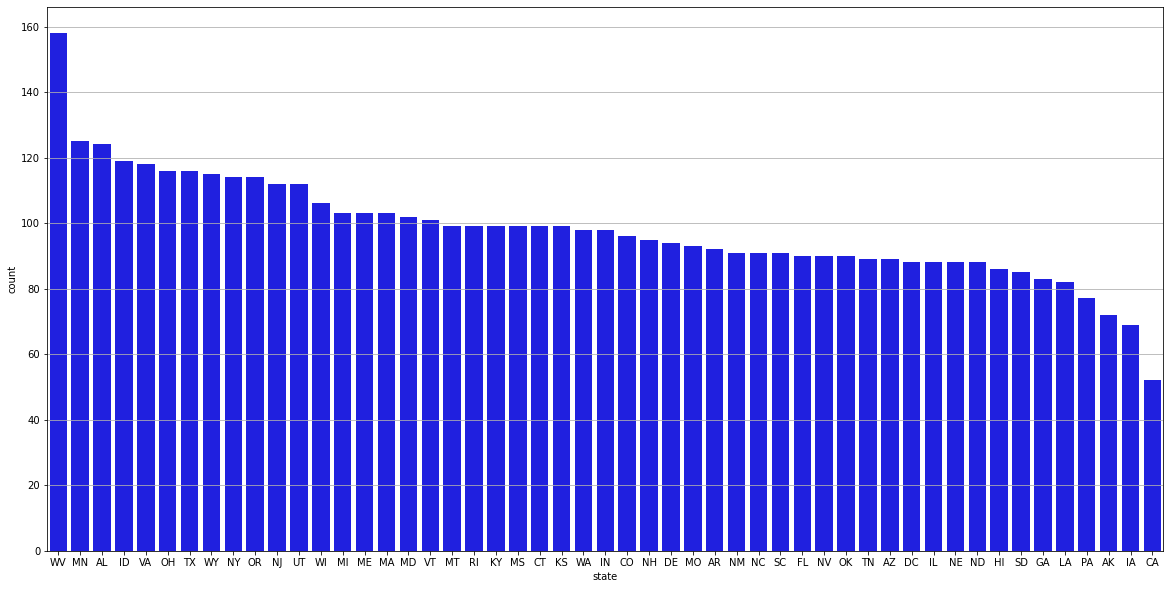

In [40]:
# Visualizando a distribuição da variável state

data = df_unif['state']

plt.figure(figsize=(20, 10))
plt.grid(True)

# countplot
sns.countplot(x = data, order= data.value_counts().index, color = "b")

In [41]:
# Verificando o skew
data.value_counts().skew()

0.6035236549222945

### Variável account_length

Sumário estatístico da variável account_length

count    5000.00000
mean      100.25860
std        39.69456
min         1.00000
25%        73.00000
50%       100.00000
75%       127.00000
max       243.00000
Name: account_length, dtype: float64


Verificando o skew account_length

0.1092911238427682


Visualizando o histograma distribuição da variável account_length



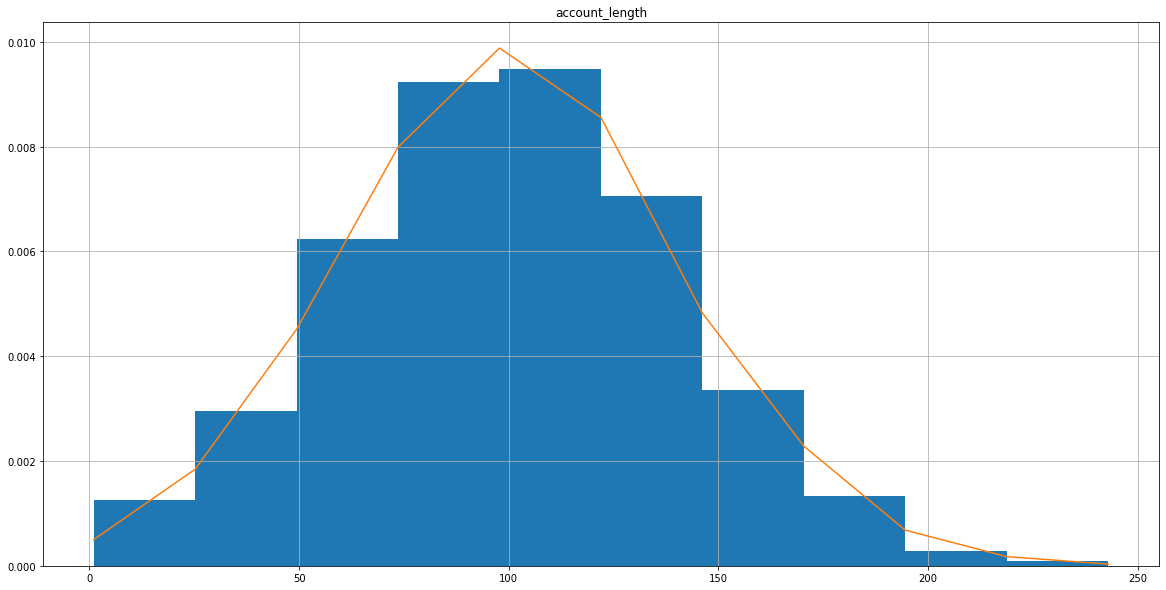



Verificando a distribuição da variável account_length

account_length
1      11
2       2
3       8
4       3
5       2
       ..
225     2
232     2
233     1
238     1
243     1
Length: 218, dtype: int64


Visualizando o boxplot distribuição da variável account_length



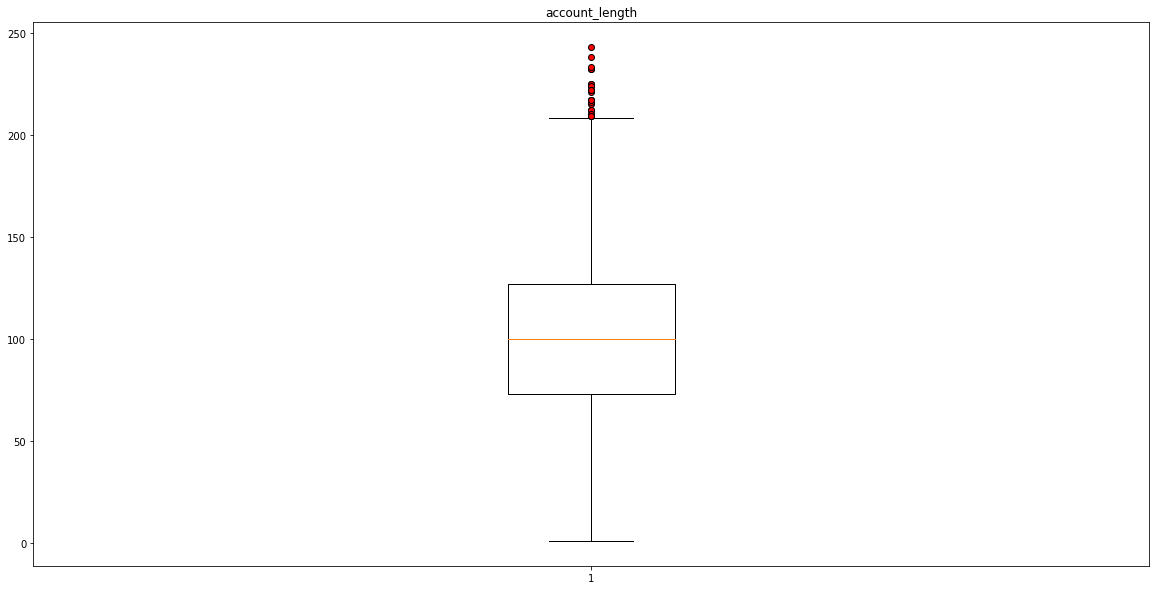

In [42]:
# Executando a função de sumário
varSummary(df_unif, 'account_length')

### Variável area_code

Sumário estatístico da variável area_code

count    5000.00000
mean        1.99740
std         0.70788
min         1.00000
25%         1.00000
50%         2.00000
75%         2.00000
max         3.00000
Name: area_code, dtype: float64


Verificando o skew area_code

0.003689029936227274


Visualizando o histograma distribuição da variável area_code



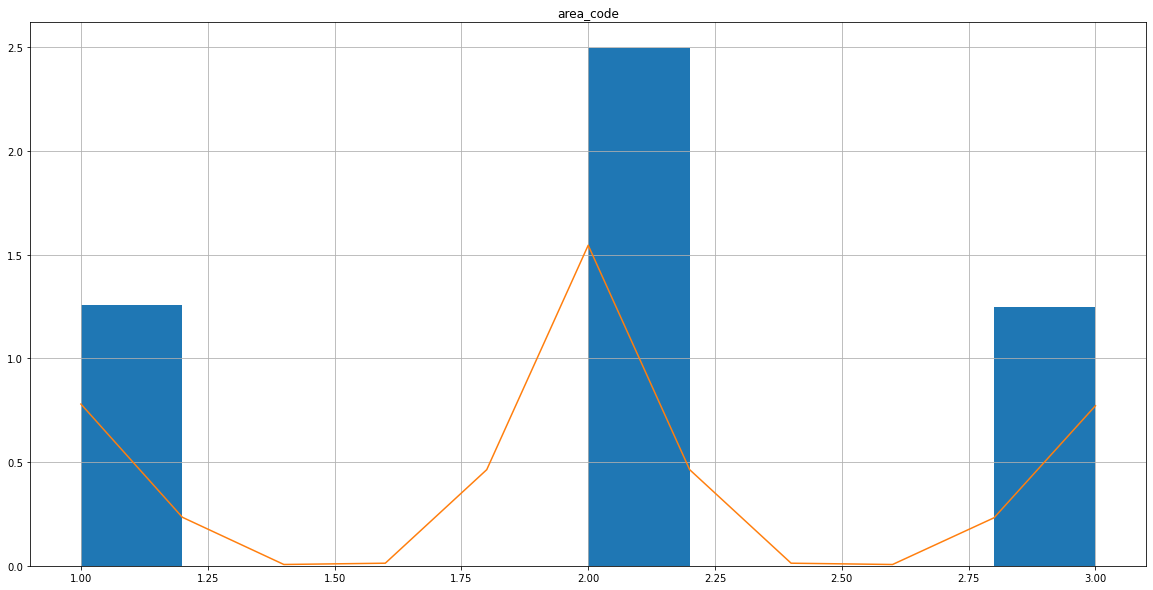



Verificando a distribuição da variável area_code

area_code
1    1259
2    2495
3    1246
dtype: int64


Visualizando o boxplot distribuição da variável area_code



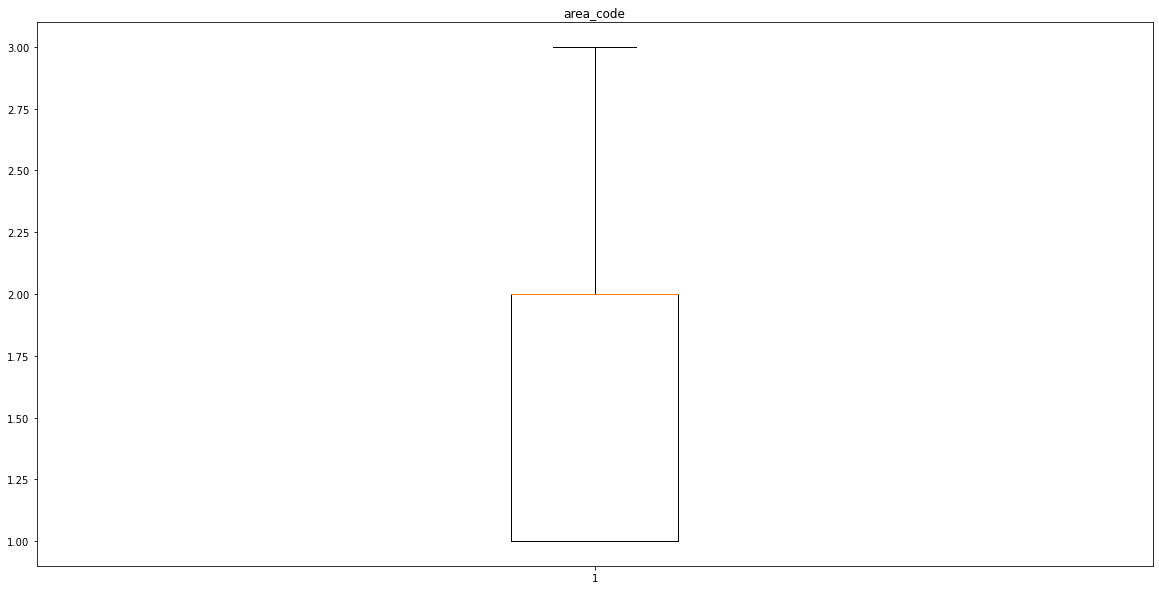

In [43]:
# Executando a função de sumário
varSummary(df_unif, 'area_code')

### Variável international_plan

Sumário estatístico da variável international_plan

count    5000.000000
mean        0.094600
std         0.292691
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: international_plan, dtype: float64


Verificando o skew international_plan

2.771266203877624


Visualizando o histograma distribuição da variável international_plan



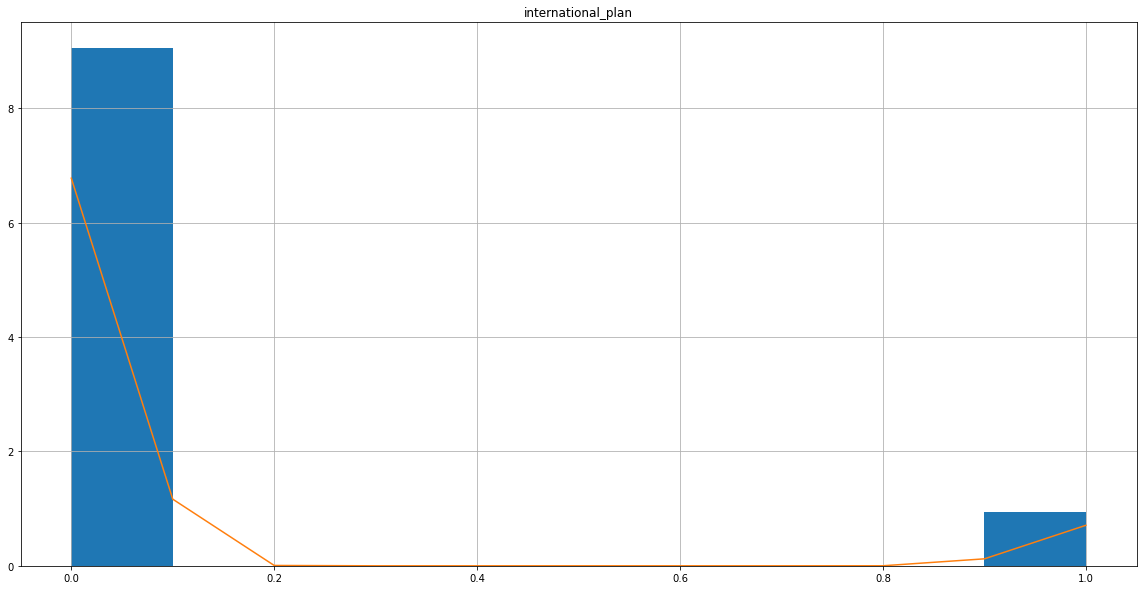



Verificando a distribuição da variável international_plan

international_plan
0    4527
1     473
dtype: int64


Visualizando o boxplot distribuição da variável international_plan



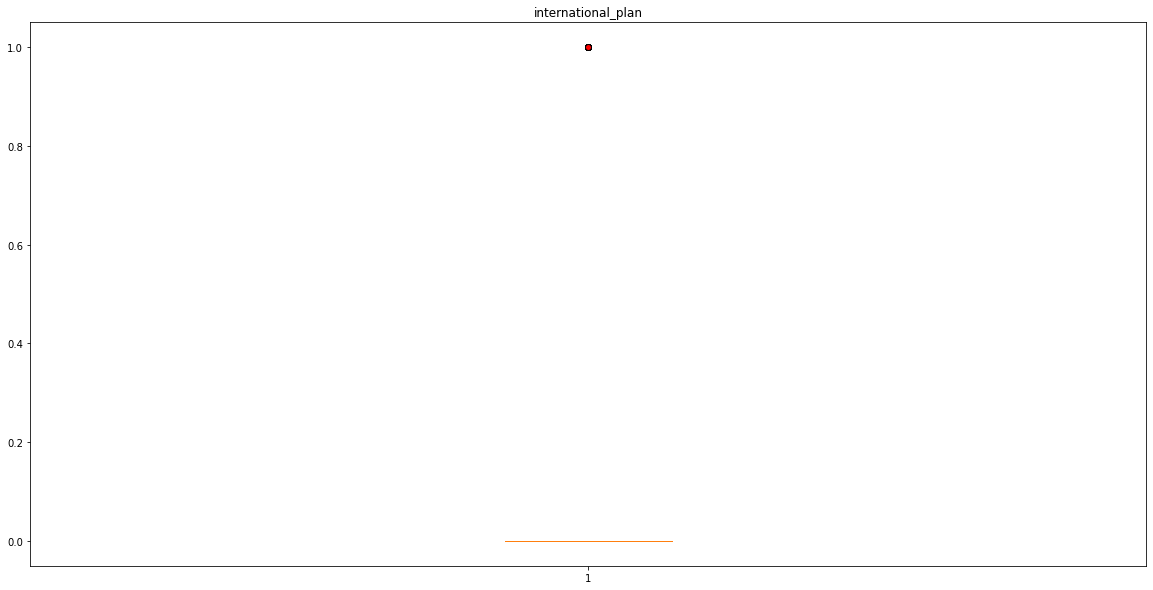

In [44]:
# Executando a função de sumário 
varSummary(df_unif, 'international_plan')

### Variável voice_mail_plan

Sumário estatístico da variável voice_mail_plan

count    5000.000000
mean        0.264600
std         0.441164
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: voice_mail_plan, dtype: float64


Verificando o skew voice_mail_plan

1.067603626199111


Visualizando o histograma distribuição da variável voice_mail_plan



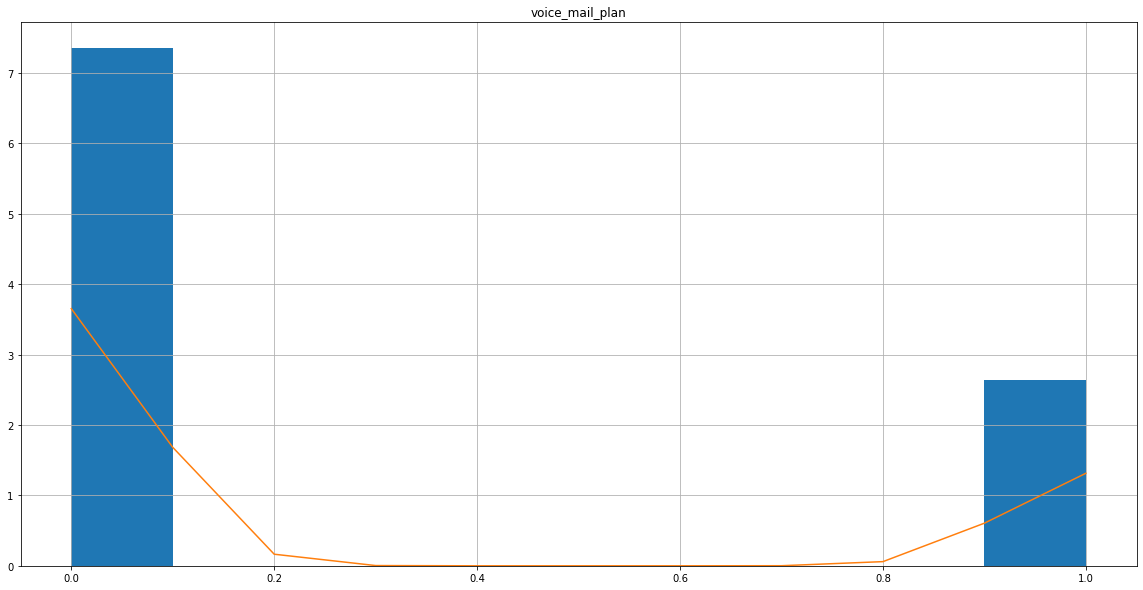



Verificando a distribuição da variável voice_mail_plan

voice_mail_plan
0    3677
1    1323
dtype: int64


Visualizando o boxplot distribuição da variável voice_mail_plan



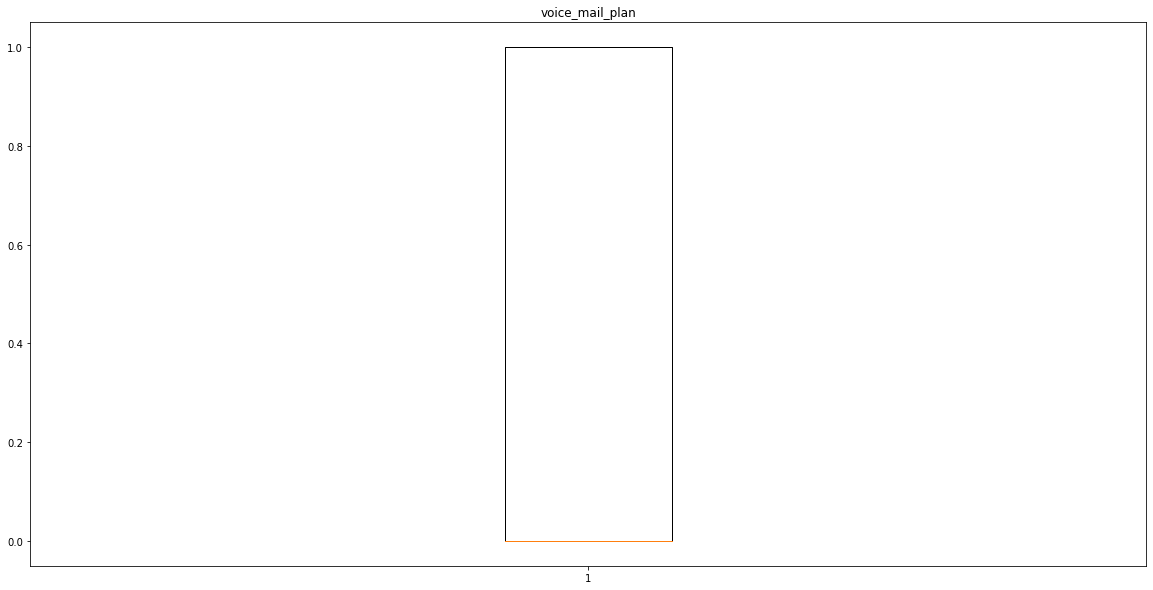

In [45]:
# Executando a função de sumário 
varSummary(df_unif, 'voice_mail_plan')

### Variável number_vmail_messages

Sumário estatístico da variável number_vmail_messages

count    5000.000000
mean        7.755200
std        13.546393
min         0.000000
25%         0.000000
50%         0.000000
75%        17.000000
max        52.000000
Name: number_vmail_messages, dtype: float64


Verificando o skew number_vmail_messages

1.3504931974826235


Visualizando o histograma distribuição da variável number_vmail_messages



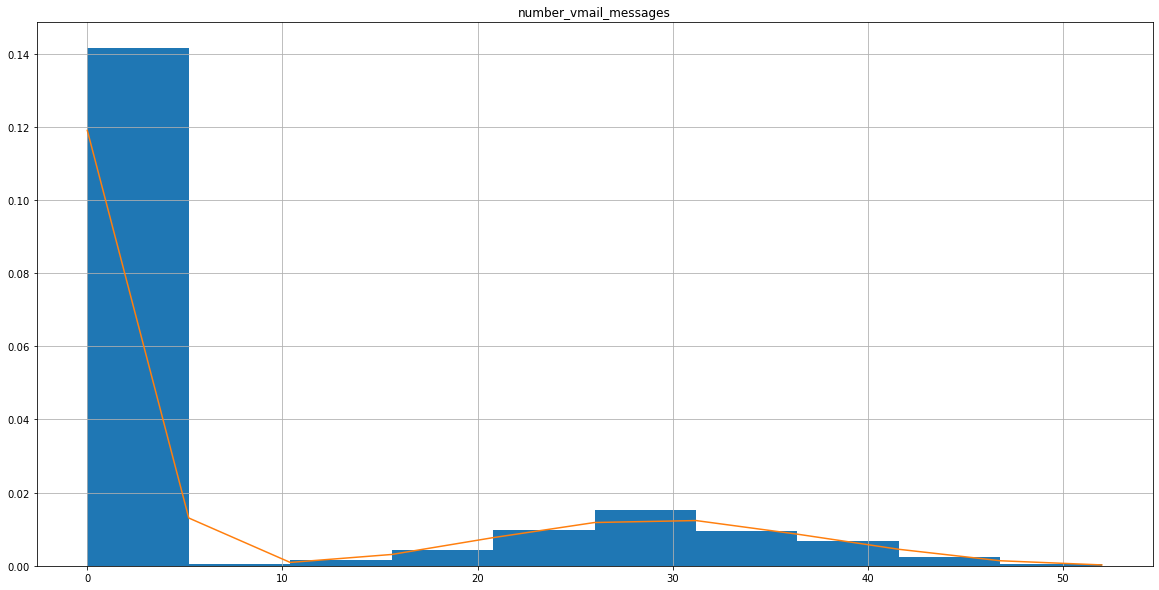



Verificando a distribuição da variável number_vmail_messages

number_vmail_messages
0     3678
4        1
6        2
8        2
9        2
10       4
11       2
12      11
13       4
14       9
15      13
16      17
17      21
18      18
19      27
20      32
21      41
22      47
23      52
24      64
25      51
26      58
27      64
28      67
29      67
30      58
31      83
32      57
33      66
34      41
35      41
36      45
37      43
38      41
39      42
40      28
41      22
42      19
43      16
44       9
45      11
46       8
47       4
48       5
49       3
50       2
51       1
52       1
dtype: int64


Visualizando o boxplot distribuição da variável number_vmail_messages



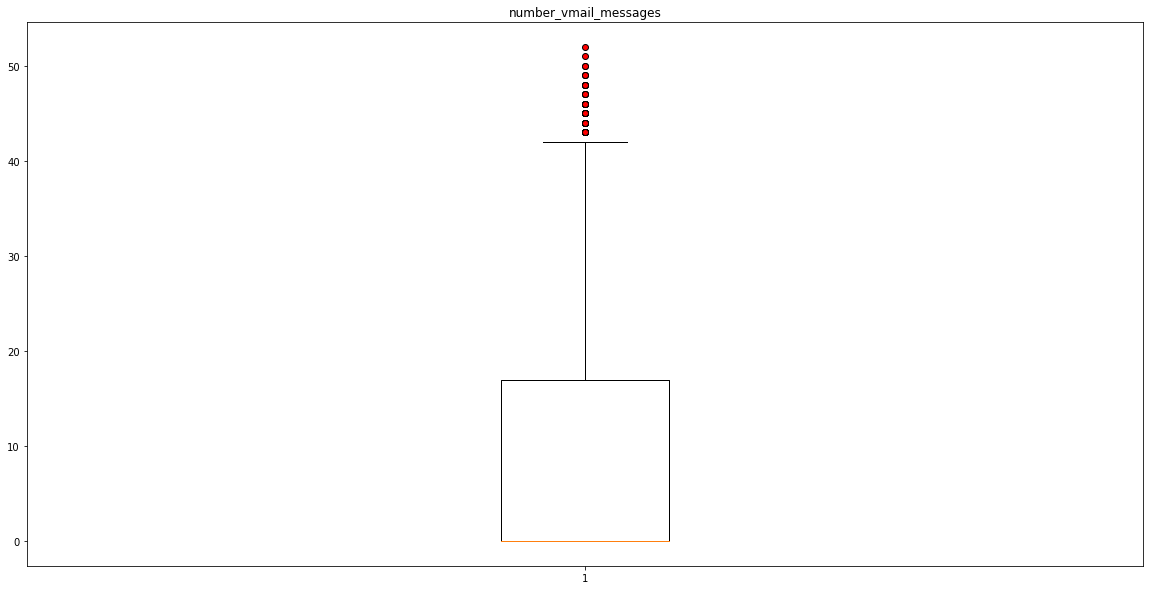

In [46]:
# Executando a função de sumário 
varSummary(df_unif, 'number_vmail_messages')

### Variável total_day_minutes

Sumário estatístico da variável total_day_minutes

count    5000.000000
mean      180.288900
std        53.894699
min         0.000000
25%       143.700000
50%       180.100000
75%       216.200000
max       351.500000
Name: total_day_minutes, dtype: float64


Verificando o skew total_day_minutes

-0.011730827167578775


Visualizando o histograma distribuição da variável total_day_minutes



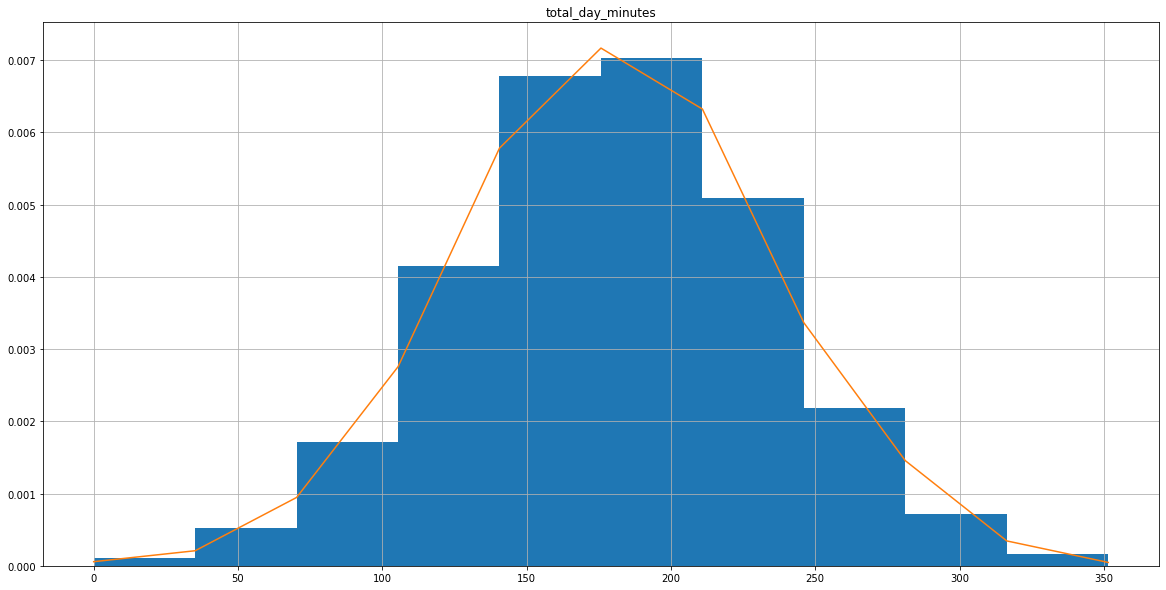



Verificando a distribuição da variável total_day_minutes

total_day_minutes
0.0      2
2.6      1
6.6      1
7.2      1
7.8      1
        ..
338.4    1
345.3    1
346.8    1
350.8    1
351.5    1
Length: 1961, dtype: int64


Visualizando o boxplot distribuição da variável total_day_minutes



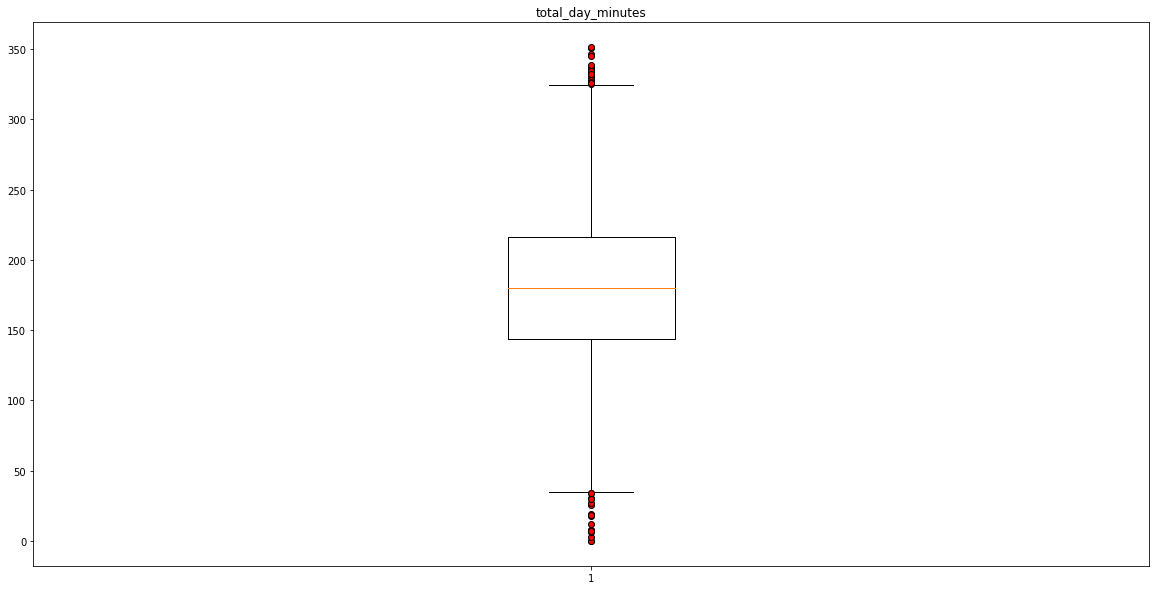

In [47]:
# Executando a função de sumário 
varSummary(df_unif, 'total_day_minutes')

### Variável total_day_calls

Sumário estatístico da variável total_day_calls

count    5000.000000
mean      100.029400
std        19.831197
min         0.000000
25%        87.000000
50%       100.000000
75%       113.000000
max       165.000000
Name: total_day_calls, dtype: float64


Verificando o skew total_day_calls

-0.08489096367281956


Visualizando o histograma distribuição da variável total_day_calls



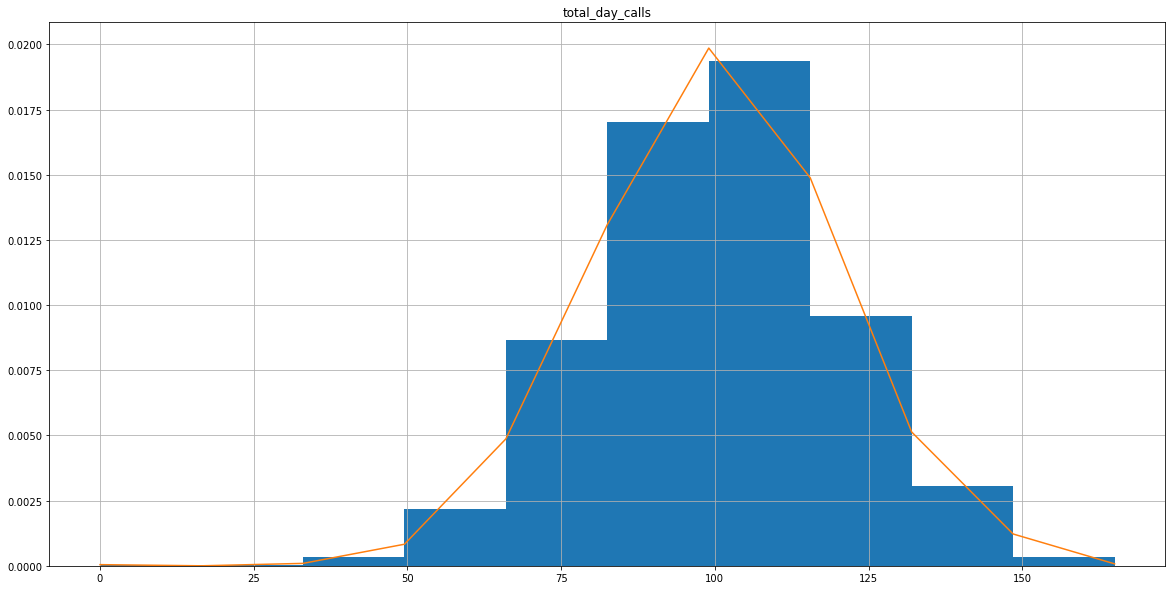



Verificando a distribuição da variável total_day_calls

total_day_calls
0      2
30     1
34     1
35     1
36     1
      ..
157    2
158    3
160    2
163    1
165    1
Length: 123, dtype: int64


Visualizando o boxplot distribuição da variável total_day_calls



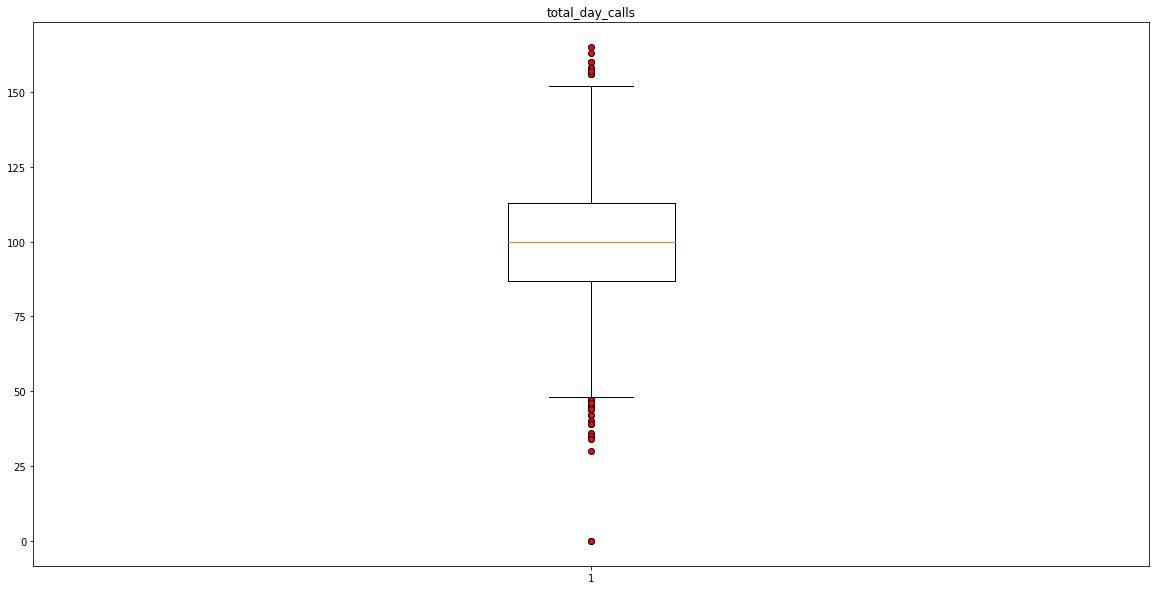

In [48]:
# Executando a função de sumário 
varSummary(df_unif, 'total_day_calls')

### Variável total_day_charge

Sumário estatístico da variável total_day_charge

count    5000.000000
mean       30.649668
std         9.162069
min         0.000000
25%        24.430000
50%        30.620000
75%        36.750000
max        59.760000
Name: total_day_charge, dtype: float64


Verificando o skew total_day_charge

-0.011729007073761826


Visualizando o histograma distribuição da variável total_day_charge



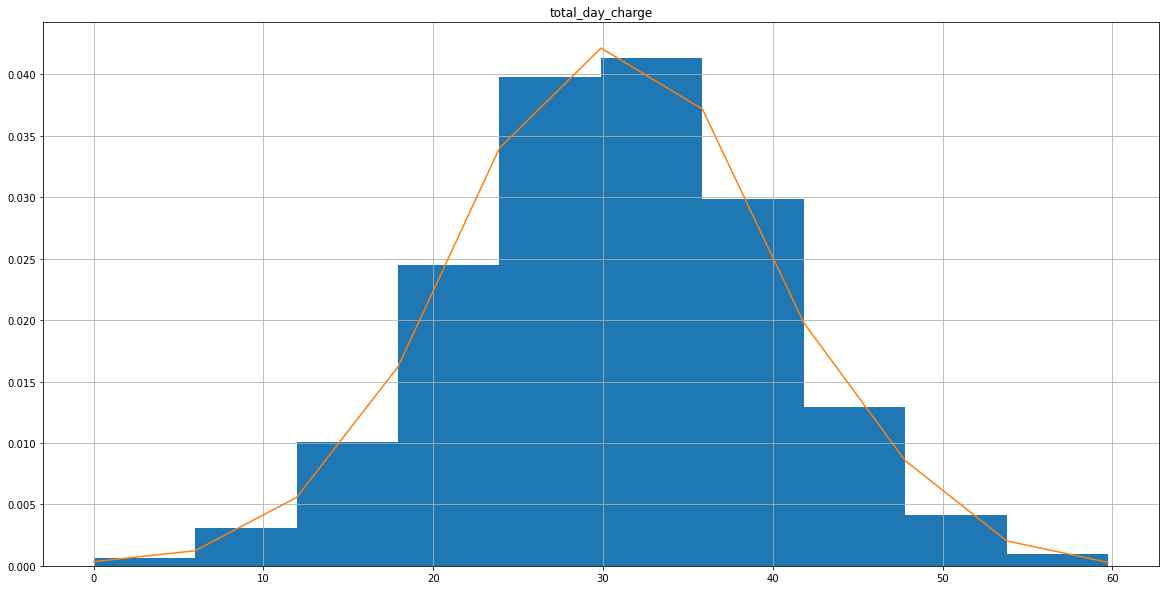



Verificando a distribuição da variável total_day_charge

total_day_charge
0.00     2
0.44     1
1.12     1
1.22     1
1.33     1
        ..
57.53    1
58.70    1
58.96    1
59.64    1
59.76    1
Length: 1961, dtype: int64


Visualizando o boxplot distribuição da variável total_day_charge



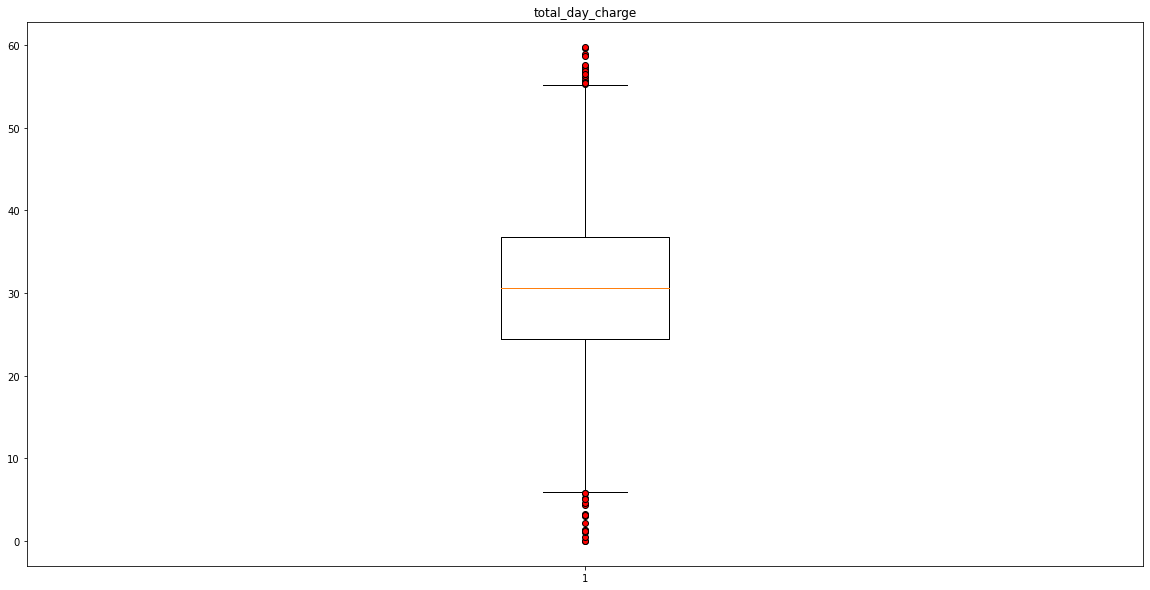

In [49]:
# Executando a função de sumário 
varSummary(df_unif, 'total_day_charge')

### Variável total_eve_minutes

Sumário estatístico da variável total_eve_minutes

count    5000.000000
mean      200.636560
std        50.551309
min         0.000000
25%       166.375000
50%       201.000000
75%       234.100000
max       363.700000
Name: total_eve_minutes, dtype: float64


Verificando o skew total_eve_minutes

-0.011017694585014734


Visualizando o histograma distribuição da variável total_eve_minutes



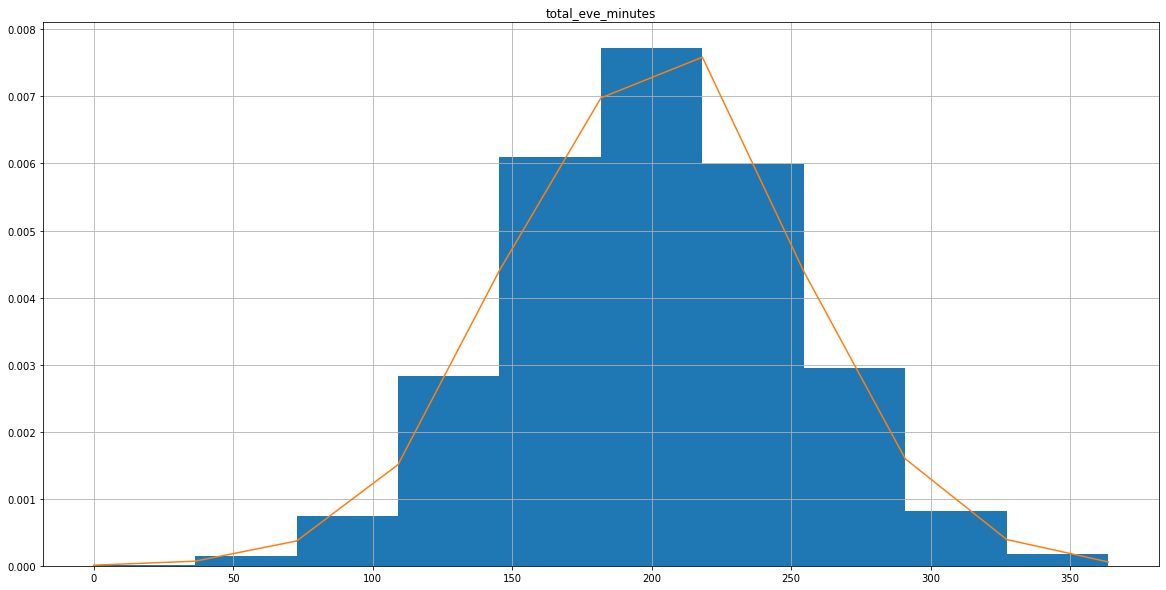



Verificando a distribuição da variável total_eve_minutes

total_eve_minutes
0.0      1
22.3     1
31.2     1
37.8     1
41.7     1
        ..
352.1    1
354.2    1
359.3    1
361.8    1
363.7    1
Length: 1879, dtype: int64


Visualizando o boxplot distribuição da variável total_eve_minutes



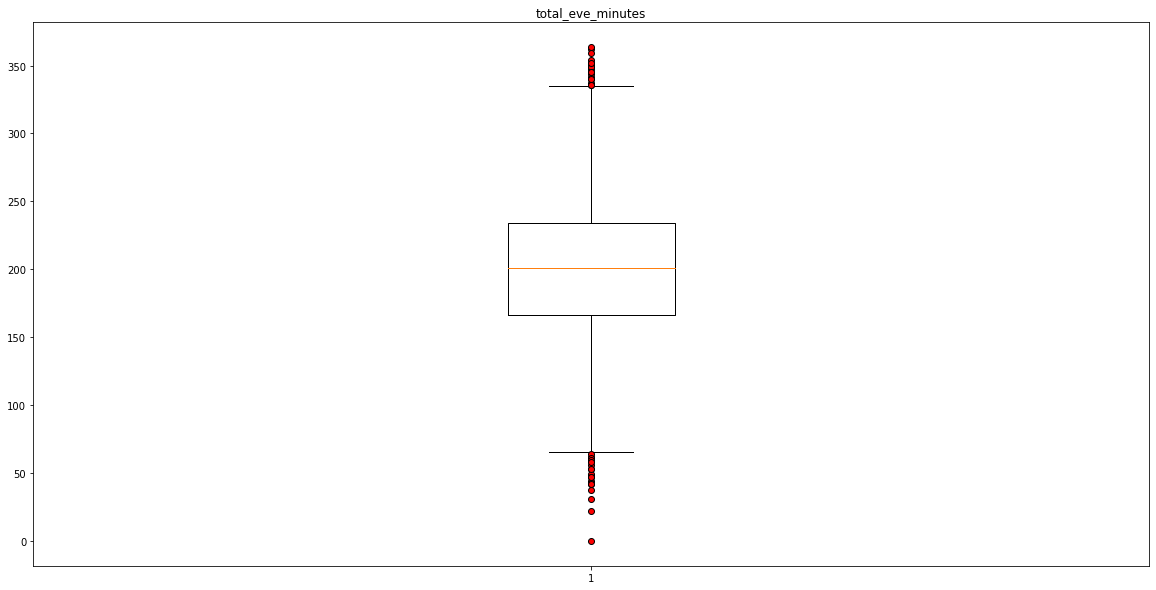

In [50]:
# Executando a função de sumário 
varSummary(df_unif, 'total_eve_minutes')

### Variável total_eve_calls

Sumário estatístico da variável total_eve_calls

count    5000.000000
mean      100.191000
std        19.826496
min         0.000000
25%        87.000000
50%       100.000000
75%       114.000000
max       170.000000
Name: total_eve_calls, dtype: float64


Verificando o skew total_eve_calls

-0.020175203277375608


Visualizando o histograma distribuição da variável total_eve_calls



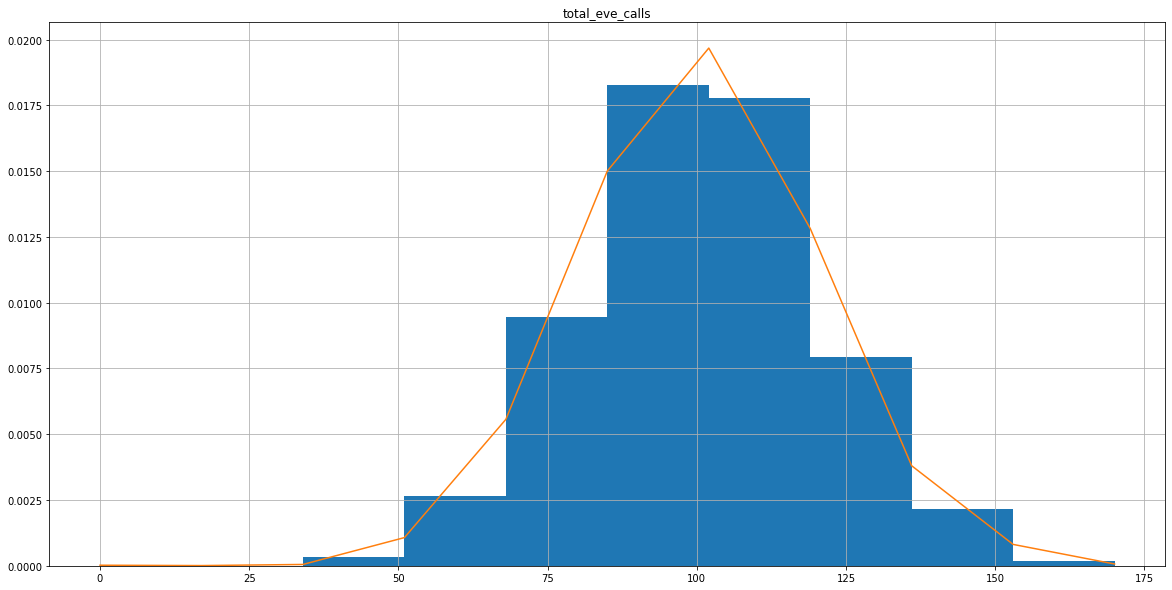



Verificando a distribuição da variável total_eve_calls

total_eve_calls
0      1
12     1
36     1
37     1
38     1
      ..
159    1
164    1
168    1
169    1
170    1
Length: 126, dtype: int64


Visualizando o boxplot distribuição da variável total_eve_calls



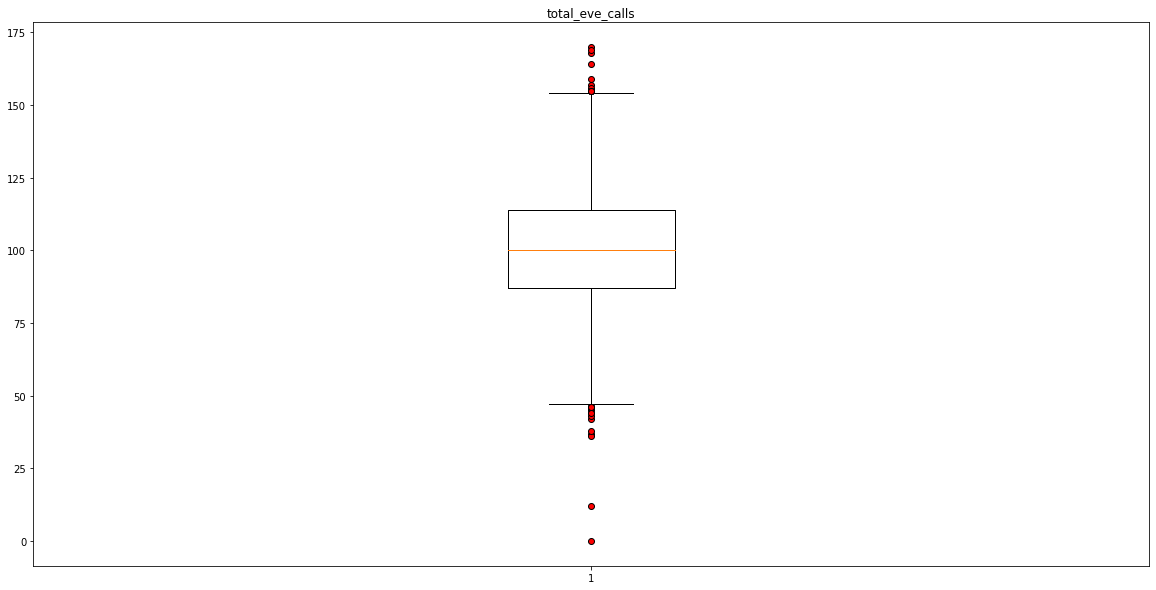

In [51]:
# Executando a função de sumário 
varSummary(df_unif, 'total_eve_calls')

### Variável total_eve_charge

Sumário estatístico da variável total_eve_charge

count    5000.000000
mean       17.054322
std         4.296843
min         0.000000
25%        14.140000
50%        17.090000
75%        19.900000
max        30.910000
Name: total_eve_charge, dtype: float64


Verificando o skew total_eve_charge

-0.010990328362308517


Visualizando o histograma distribuição da variável total_eve_charge



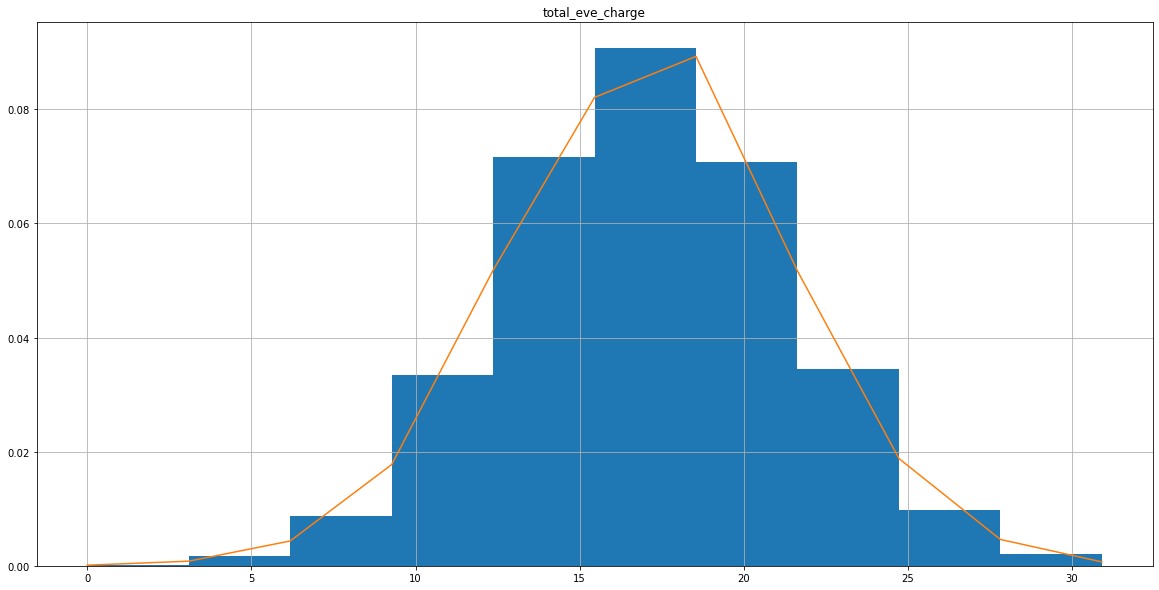



Verificando a distribuição da variável total_eve_charge

total_eve_charge
0.00     1
1.90     1
2.65     1
3.21     1
3.54     1
        ..
29.93    1
30.11    1
30.54    1
30.75    1
30.91    1
Length: 1659, dtype: int64


Visualizando o boxplot distribuição da variável total_eve_charge



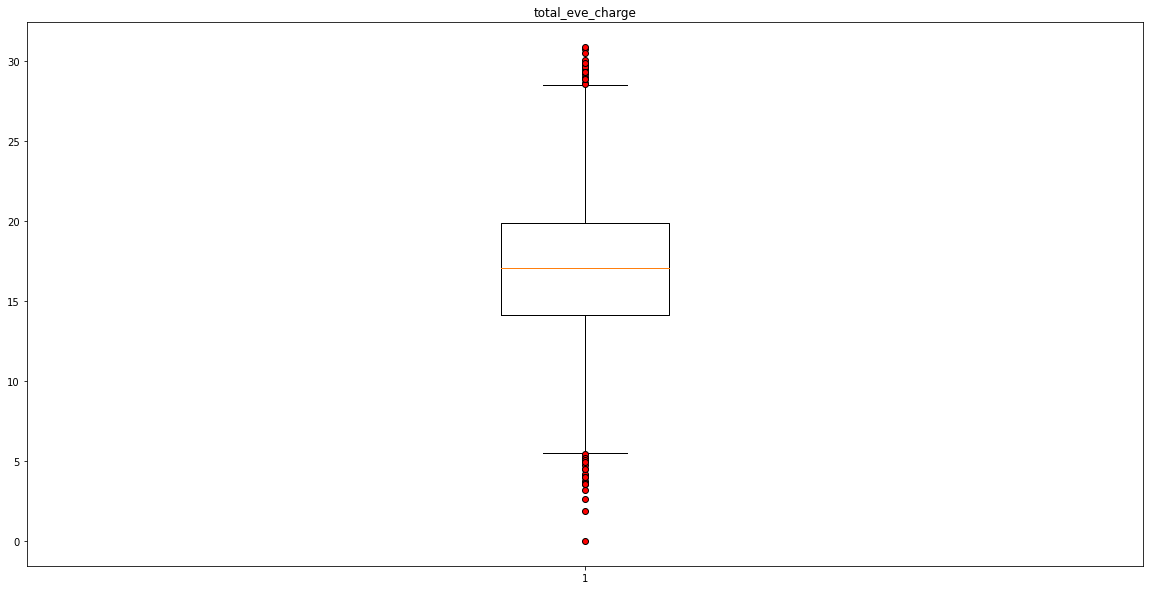

In [52]:
# Executando a função de sumário 
varSummary(df_unif, 'total_eve_charge')

### Variável total_night_minutes

Sumário estatístico da variável total_night_minutes

count    5000.000000
mean      200.391620
std        50.527789
min         0.000000
25%       166.900000
50%       200.400000
75%       234.700000
max       395.000000
Name: total_night_minutes, dtype: float64


Verificando o skew total_night_minutes

0.01932491656404777


Visualizando o histograma distribuição da variável total_night_minutes



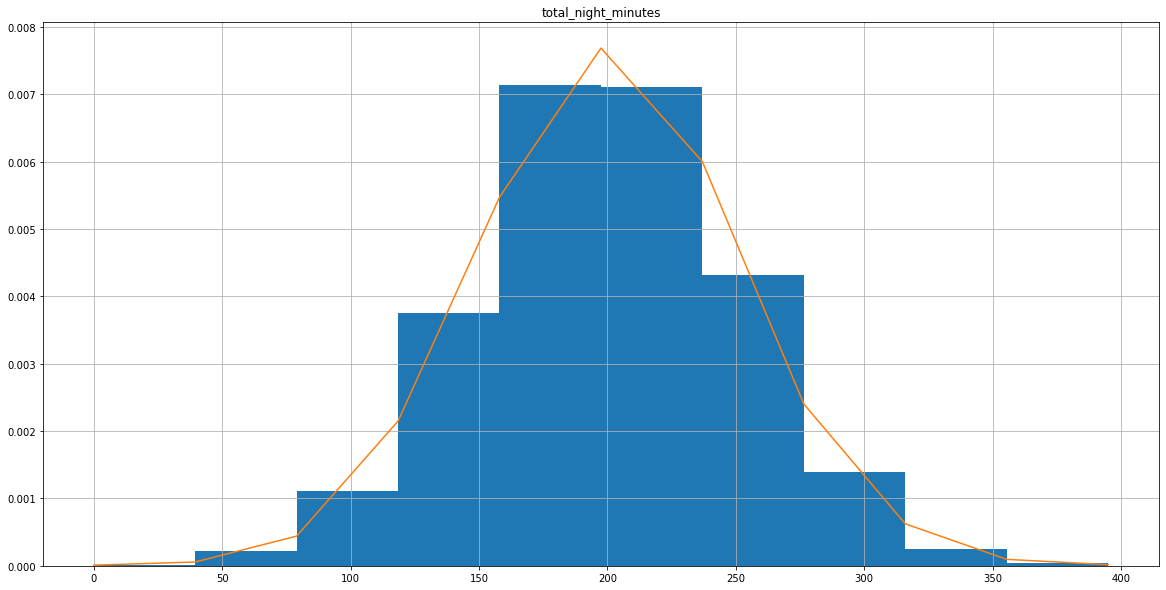



Verificando a distribuição da variável total_night_minutes

total_night_minutes
0.0      1
23.2     1
43.7     1
45.0     1
46.7     1
        ..
367.7    1
377.5    1
381.6    1
381.9    1
395.0    1
Length: 1853, dtype: int64


Visualizando o boxplot distribuição da variável total_night_minutes



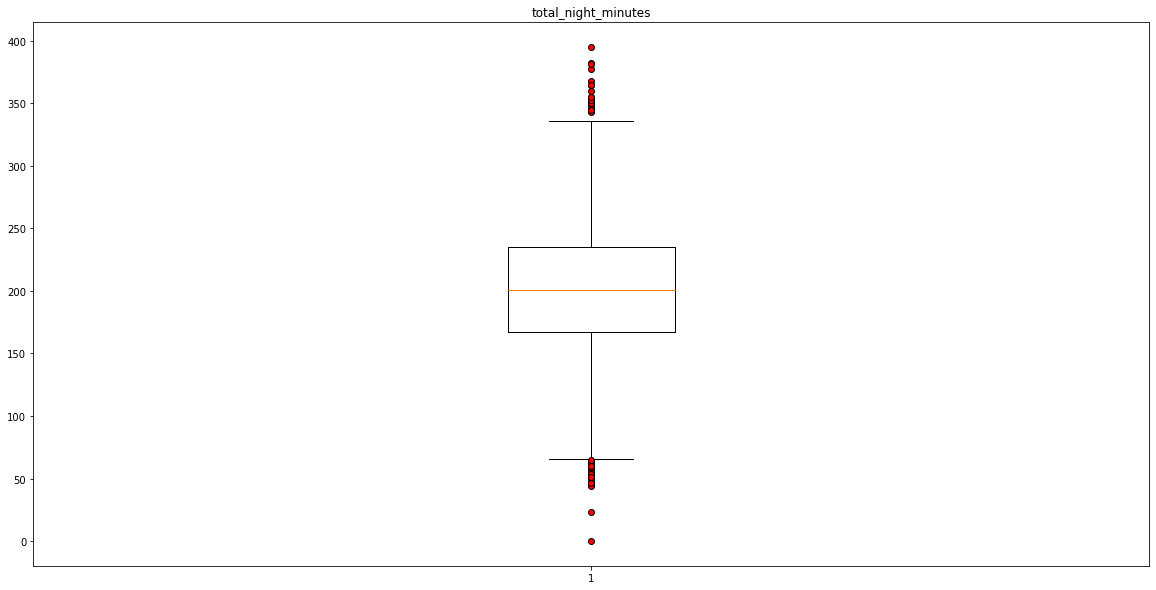

In [53]:
# Executando a função de sumário 
varSummary(df_unif, 'total_night_minutes')

### Variável total_night_calls

Sumário estatístico da variável total_night_calls

count    5000.000000
mean       99.919200
std        19.958686
min         0.000000
25%        87.000000
50%       100.000000
75%       113.000000
max       175.000000
Name: total_night_calls, dtype: float64


Verificando o skew total_night_calls

0.0021328427438912423


Visualizando o histograma distribuição da variável total_night_calls



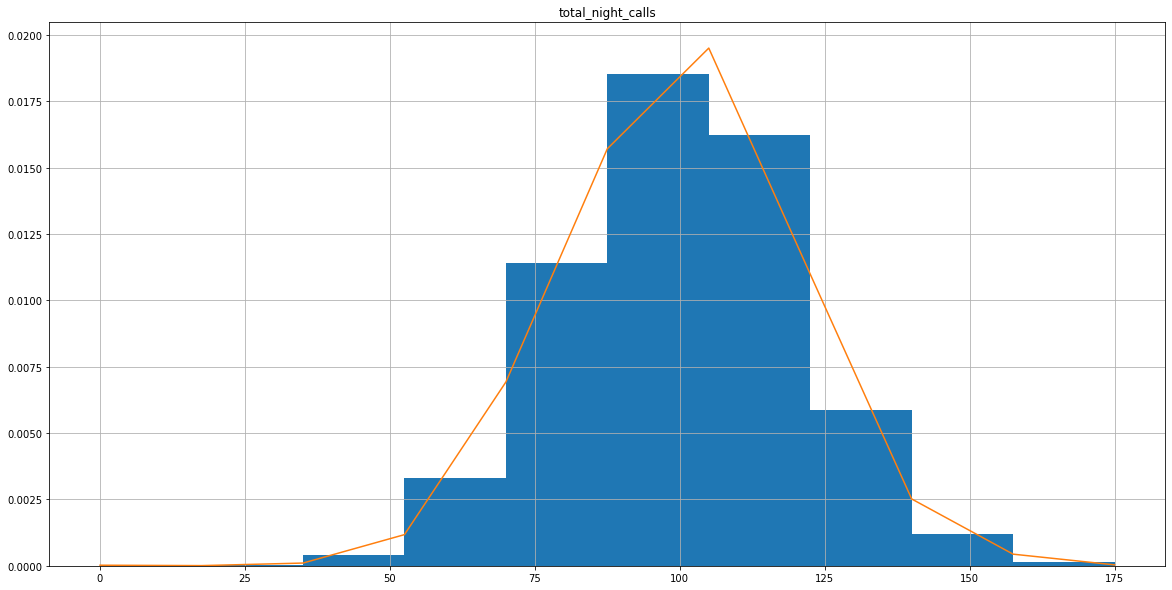



Verificando a distribuição da variável total_night_calls

total_night_calls
0      1
12     1
33     1
36     1
38     2
      ..
165    1
166    1
168    1
170    1
175    1
Length: 131, dtype: int64


Visualizando o boxplot distribuição da variável total_night_calls



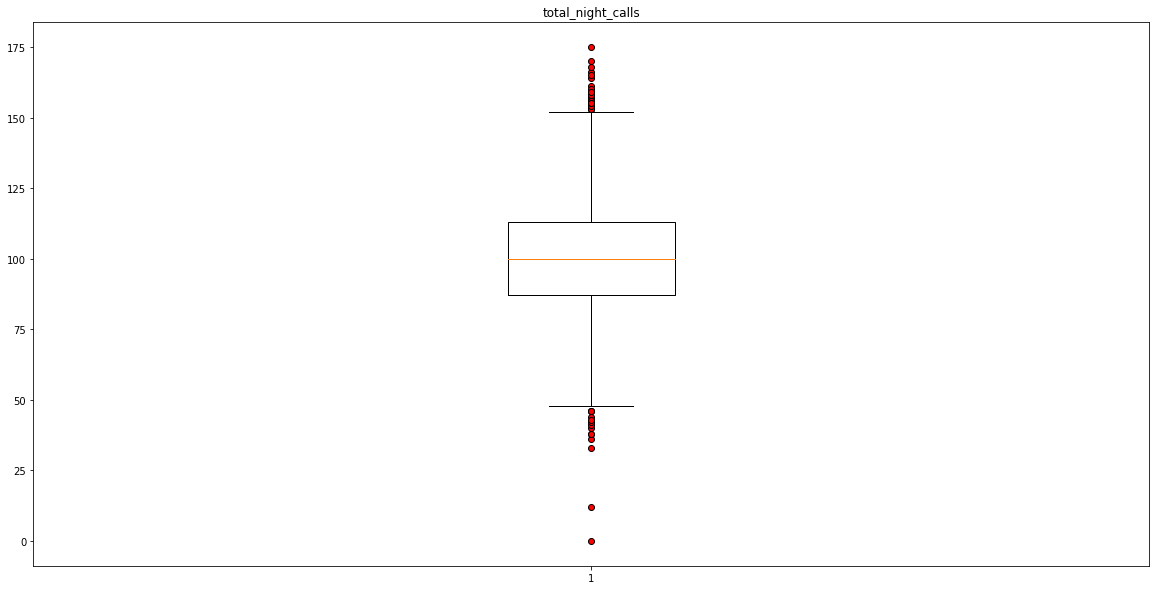

In [54]:
# Executando a função de sumário 
varSummary(df_unif, 'total_night_calls')

### Variável total_night_charge

Sumário estatístico da variável total_night_charge

count    5000.000000
mean        9.017732
std         2.273763
min         0.000000
25%         7.510000
50%         9.020000
75%        10.560000
max        17.770000
Name: total_night_charge, dtype: float64


Verificando o skew total_night_charge

0.019286744338659848


Visualizando o histograma distribuição da variável total_night_charge



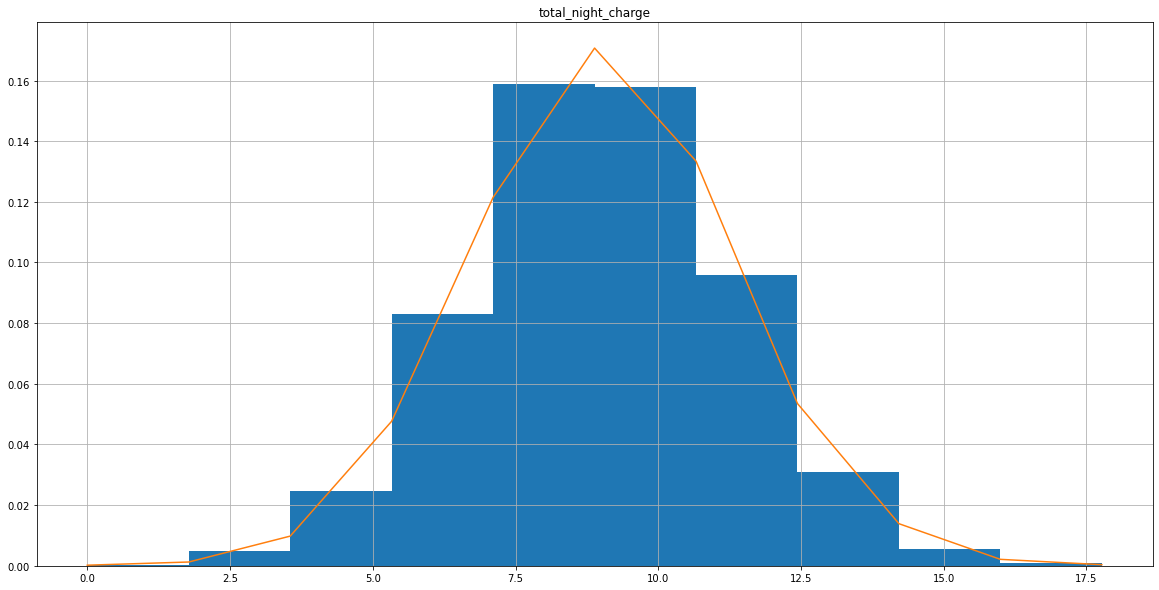



Verificando a distribuição da variável total_night_charge

total_night_charge
0.00     1
1.04     1
1.97     1
2.03     1
2.10     1
        ..
16.55    1
16.99    1
17.17    1
17.19    1
17.77    1
Length: 1028, dtype: int64


Visualizando o boxplot distribuição da variável total_night_charge



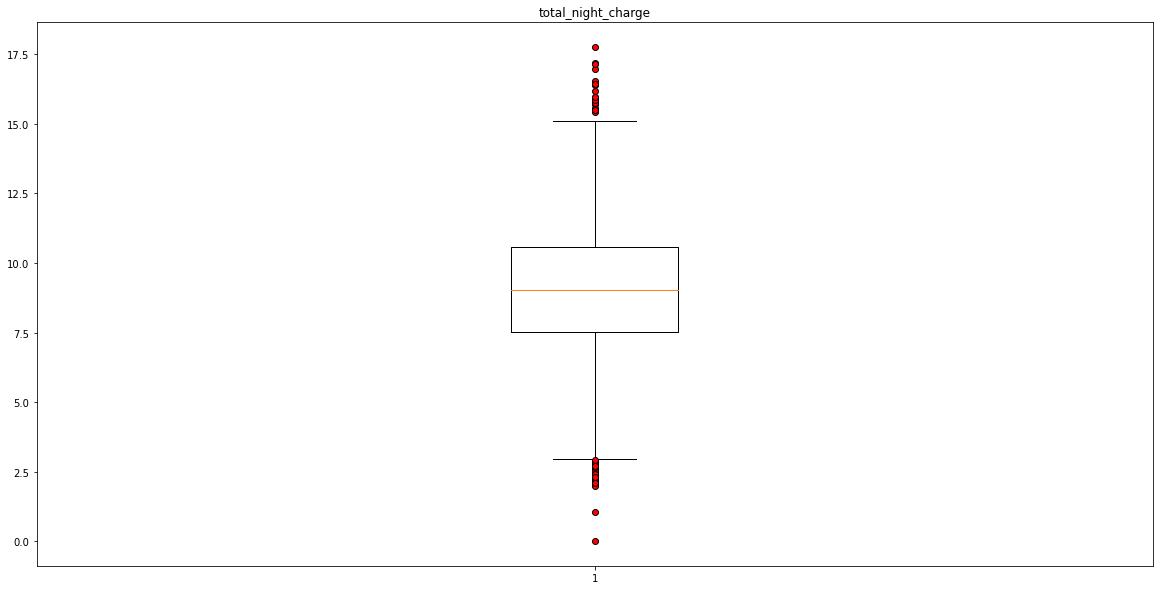

In [55]:
# Executando a função de sumário 
varSummary(df_unif, 'total_night_charge')

### Variável total_intl_minutes

Sumário estatístico da variável total_intl_minutes

count    5000.000000
mean       10.261780
std         2.761396
min         0.000000
25%         8.500000
50%        10.300000
75%        12.000000
max        20.000000
Name: total_intl_minutes, dtype: float64


Verificando o skew total_intl_minutes

-0.20996629286844293


Visualizando o histograma distribuição da variável total_intl_minutes



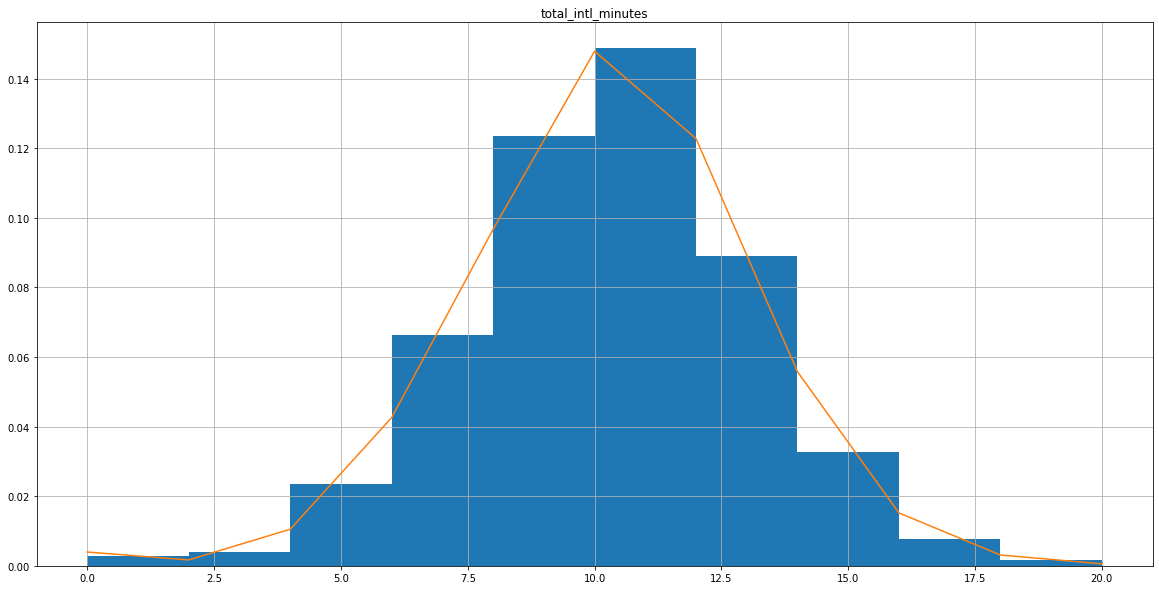



Verificando a distribuição da variável total_intl_minutes

total_intl_minutes
0.0     24
0.4      1
1.1      2
1.3      1
2.0      3
        ..
18.9     2
19.2     1
19.3     1
19.7     2
20.0     1
Length: 170, dtype: int64


Visualizando o boxplot distribuição da variável total_intl_minutes



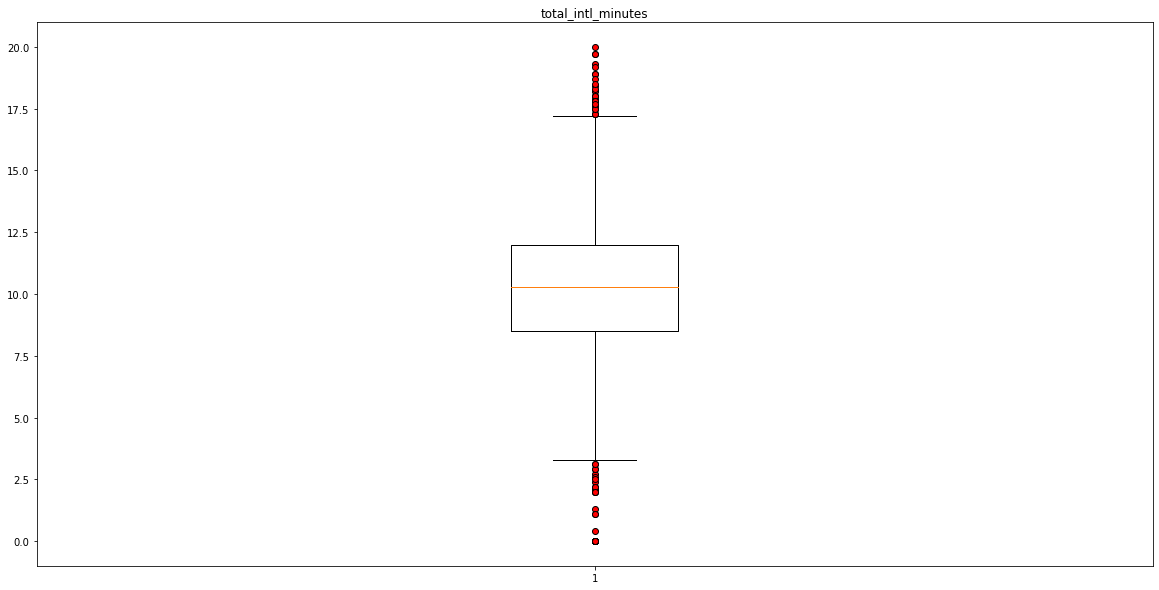

In [56]:
# Executando a função de sumário 
varSummary(df_unif, 'total_intl_minutes')

### Variável total_intl_calls

Sumário estatístico da variável total_intl_calls

count    5000.000000
mean        4.435200
std         2.456788
min         0.000000
25%         3.000000
50%         4.000000
75%         6.000000
max        20.000000
Name: total_intl_calls, dtype: float64


Verificando o skew total_intl_calls

1.360692479402265


Visualizando o histograma distribuição da variável total_intl_calls



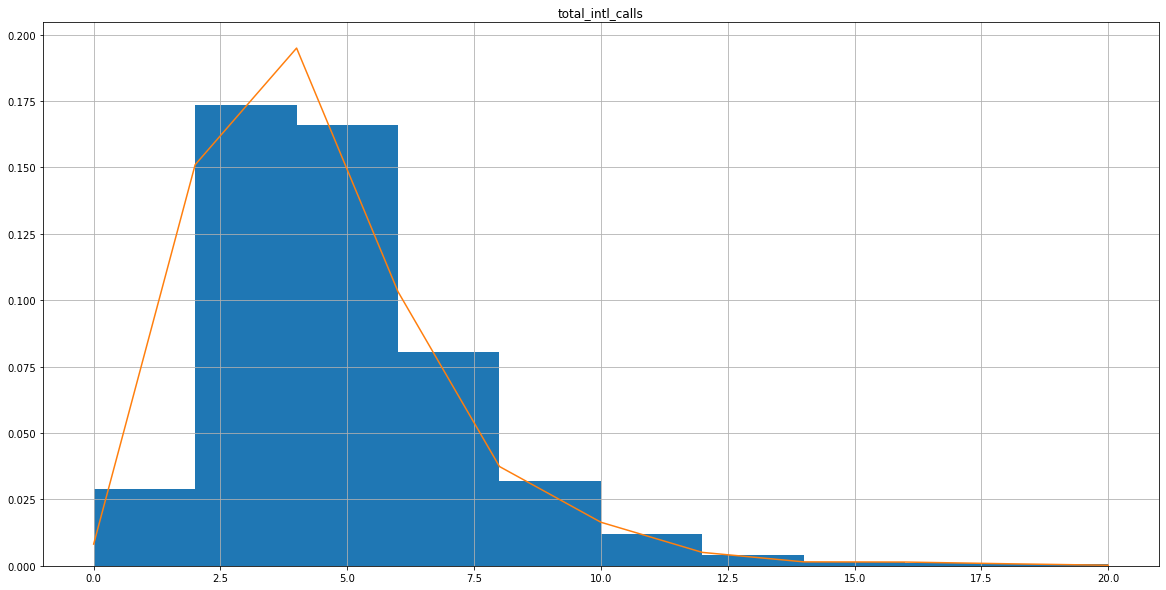



Verificando a distribuição da variável total_intl_calls

total_intl_calls
0      24
1     265
2     743
3     992
4     953
5     706
6     495
7     308
8     172
9     148
10     76
11     45
12     23
13     19
14      6
15      9
16      7
17      2
18      4
19      2
20      1
dtype: int64


Visualizando o boxplot distribuição da variável total_intl_calls



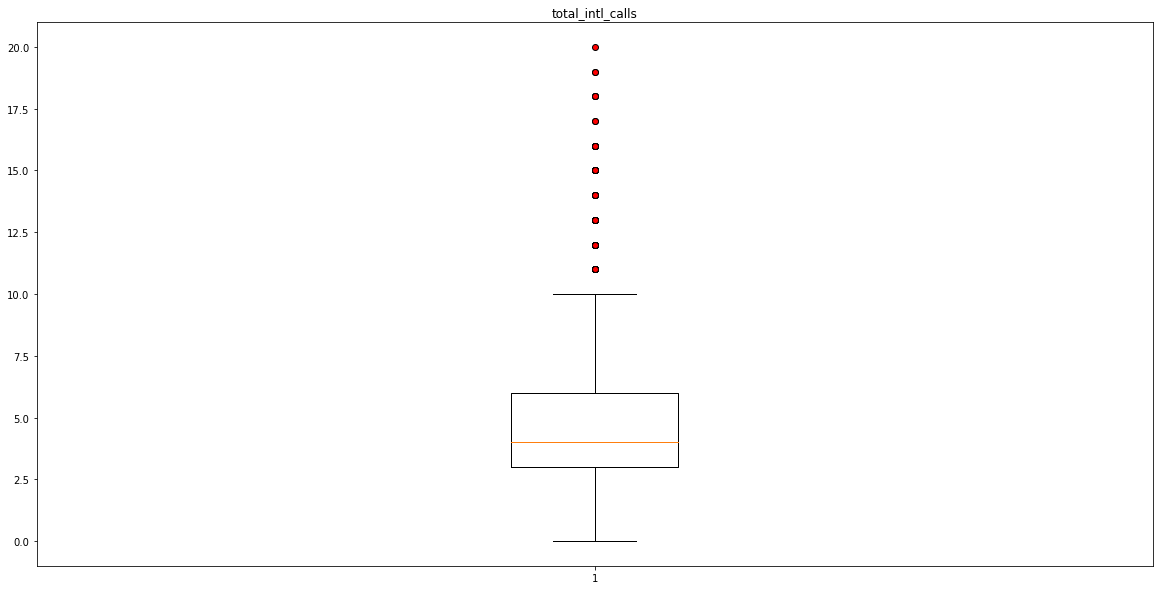

In [57]:
# Executando a função de sumário 
varSummary(df_unif, 'total_intl_calls')

### Variável total_intl_charge

Sumário estatístico da variável total_intl_charge

count    5000.000000
mean        2.771196
std         0.745514
min         0.000000
25%         2.300000
50%         2.780000
75%         3.240000
max         5.400000
Name: total_intl_charge, dtype: float64


Verificando o skew total_intl_charge

-0.21028611467847302


Visualizando o histograma distribuição da variável total_intl_charge



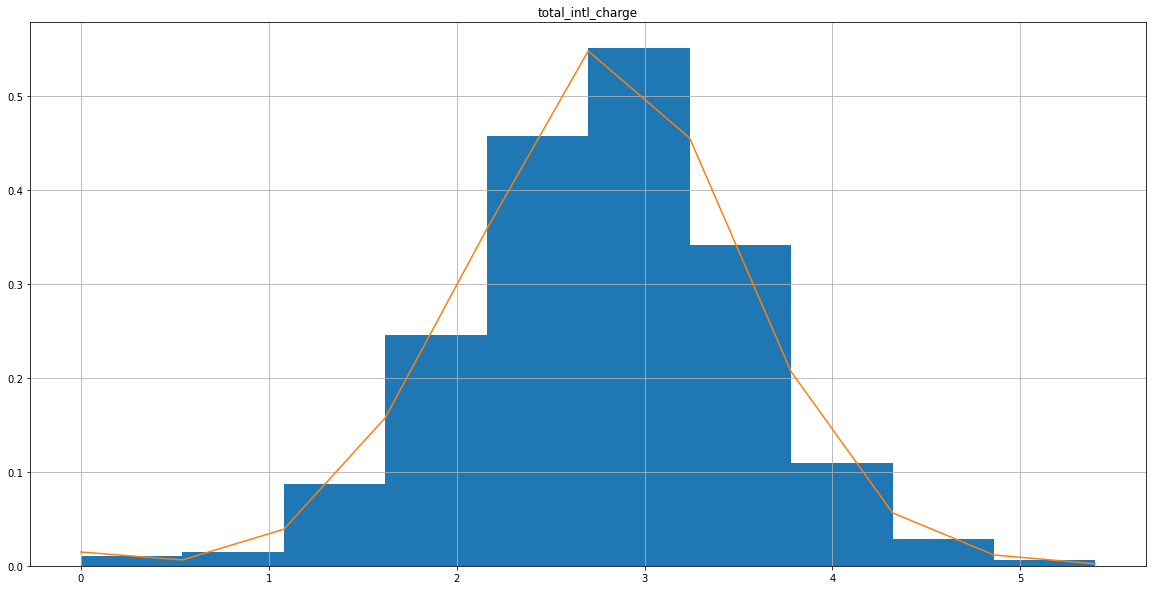



Verificando a distribuição da variável total_intl_charge

total_intl_charge
0.00    24
0.11     1
0.30     2
0.35     1
0.54     3
        ..
5.10     2
5.18     1
5.21     1
5.32     2
5.40     1
Length: 170, dtype: int64


Visualizando o boxplot distribuição da variável total_intl_charge



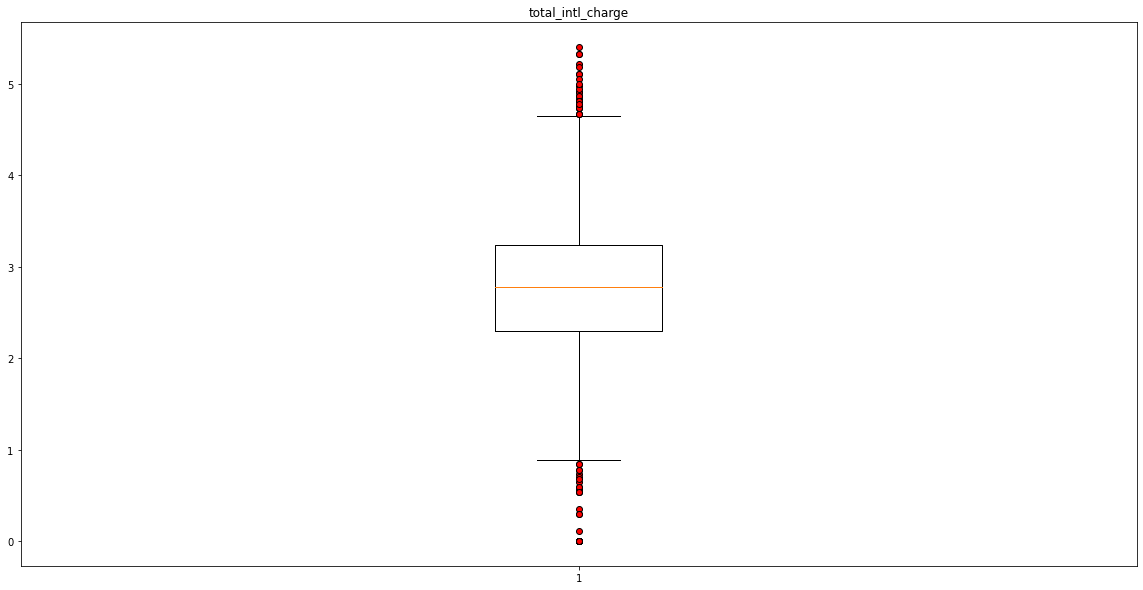

In [58]:
# Executando a função de sumário 
varSummary(df_unif, 'total_intl_charge')

### Variável number_customer_service_calls

Sumário estatístico da variável number_customer_service_calls

count    5000.000000
mean        1.570400
std         1.306363
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         9.000000
Name: number_customer_service_calls, dtype: float64


Verificando o skew number_customer_service_calls

1.042462330340439


Visualizando o histograma distribuição da variável number_customer_service_calls



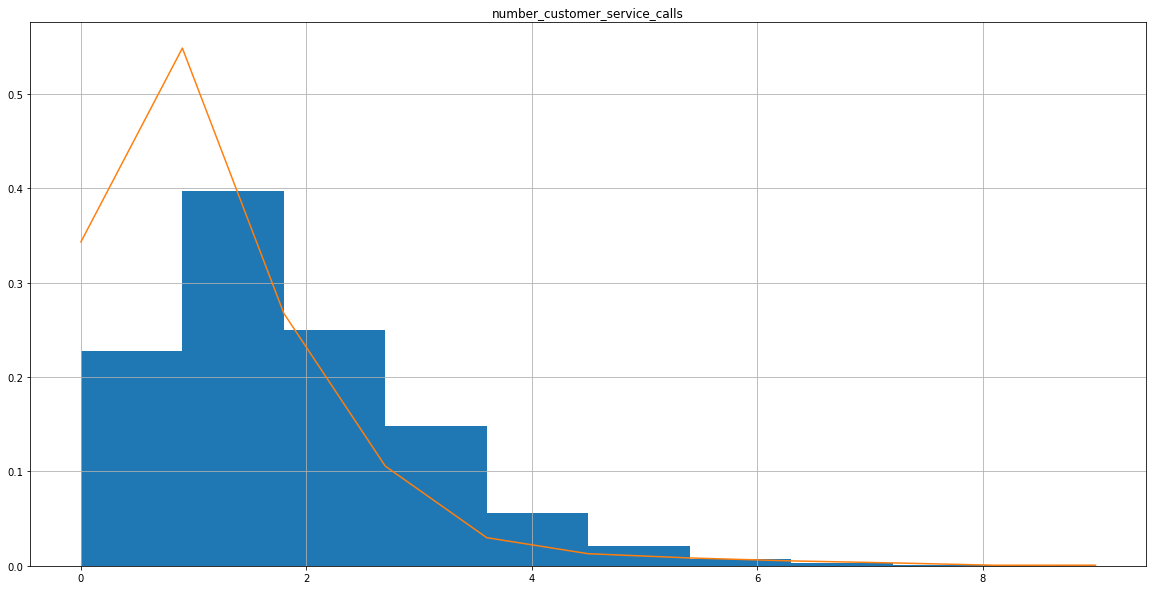



Verificando a distribuição da variável number_customer_service_calls

number_customer_service_calls
0    1023
1    1786
2    1127
3     665
4     252
5      96
6      34
7      13
8       2
9       2
dtype: int64


Visualizando o boxplot distribuição da variável number_customer_service_calls



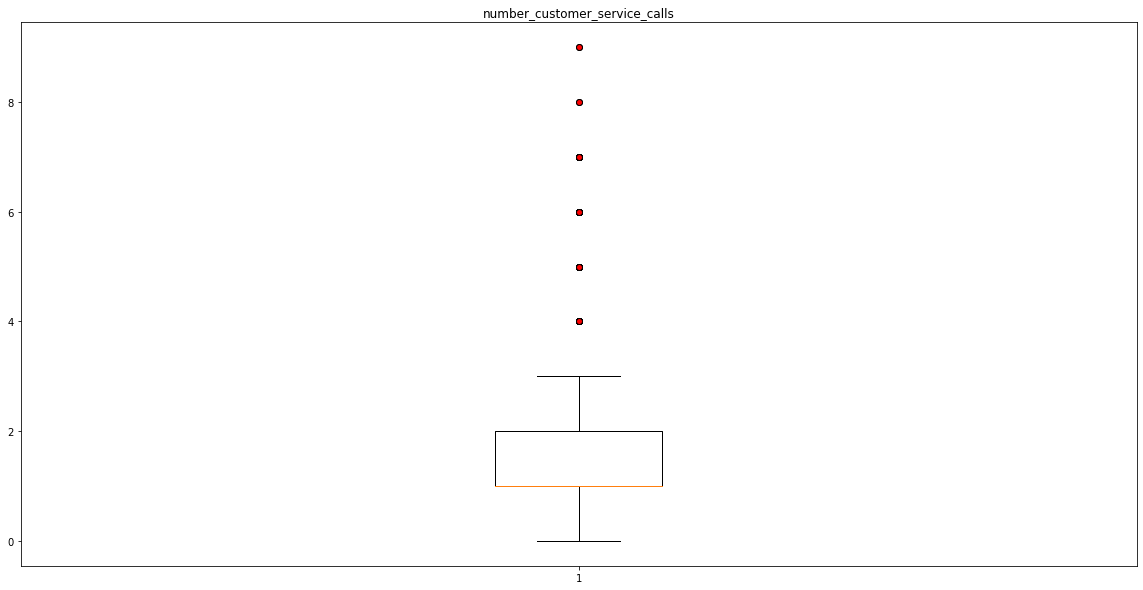

In [59]:
# Executando a função de sumário 
varSummary(df_unif, 'number_customer_service_calls')

### Variável Target churn

Sumário estatístico da variável churn

count    5000.000000
mean        0.141400
std         0.348469
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: churn, dtype: float64


Verificando o skew churn

2.0589720576629857


Visualizando o histograma distribuição da variável churn



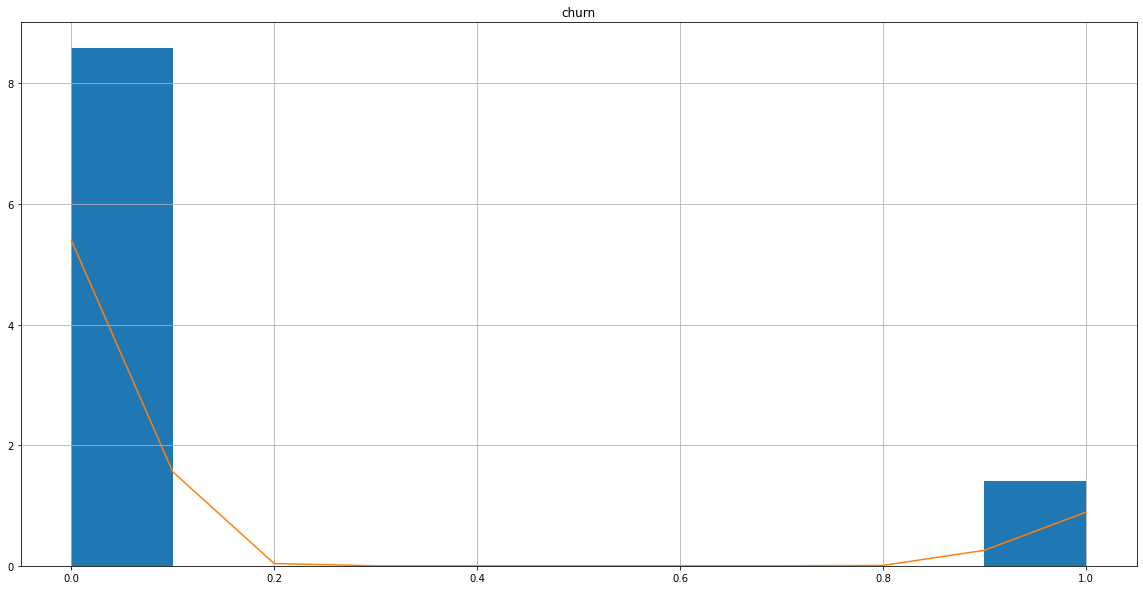



Verificando a distribuição da variável churn

churn
0    4293
1     707
dtype: int64


Visualizando o boxplot distribuição da variável churn



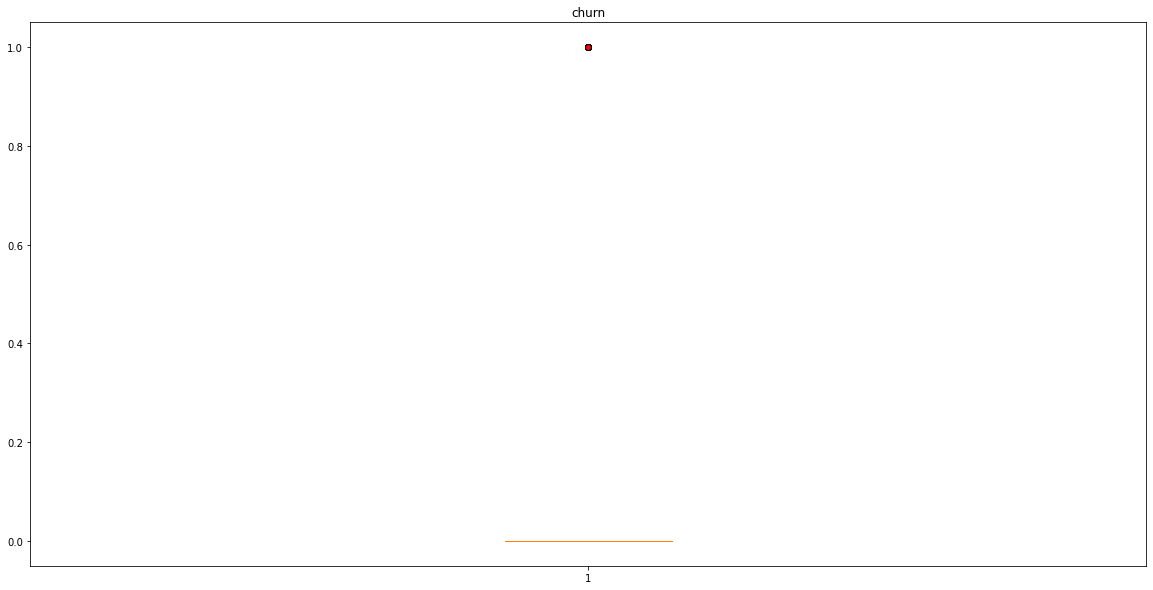

In [60]:
# Executando a função de sumário 
varSummary(df_unif, 'churn')

#### Matriz de correlação

<AxesSubplot:>

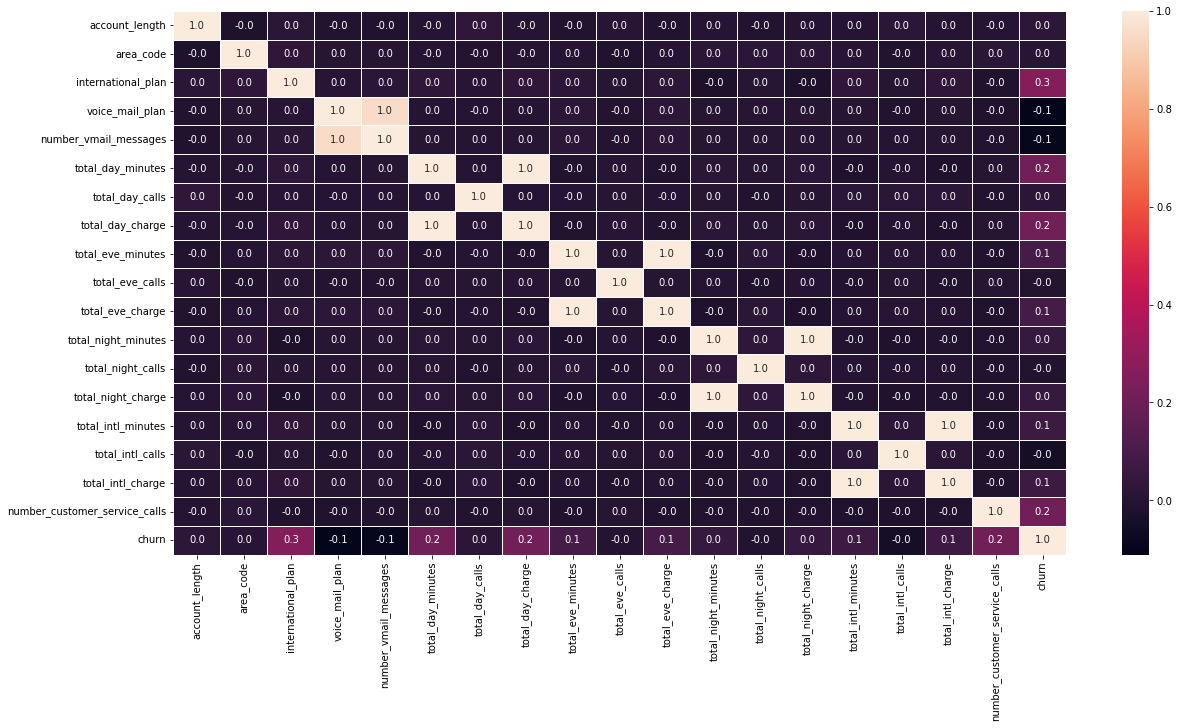

In [61]:
# Plotando da matriz de correlação
correlation = df_unif.corr()

plt.figure(figsize=(20, 10))
sns.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)

### Balanceamento de Carga

In [62]:
# Convertendo a variável categóriga state de string para inteiro
# A técnica de SMOTE não aceita string 

# Extraindo os valores unicos
labels = df_unif['state'].unique()

# Criando diciorário e enumerando os valores
labels = {k:i for i, k in enumerate(labels, 1)}

# Aplicando o dicionário na variável
df_unif['state'] = df_unif['state'].map(labels)

In [63]:
# Resampling utilizando técnica SMOTE para balanceamento da variavel TARGET

# Definindo o método pela classe minoritária
metodo = SMOTE(sampling_strategy= 'minority')

# Separando os componentes de input e output
x_resamp = df_unif.drop('churn', axis= 1)
y_resamp = df_unif['churn']

# Aplicando a técnica de resampling
x_resamp, y_resamp = metodo.fit_resample(x_resamp, y_resamp)

print('0', len(y_resamp[y_resamp==0]), '\n1', len(y_resamp[y_resamp==1]))

0 4293 
1 4293


### Normalização

In [64]:
# Normalizando os dados
scaler = MinMaxScaler(feature_range= (0, 1))
rescaledX = scaler.fit_transform(x_resamp)

### Redimensionando os dados

In [65]:
# Redimensionando o dataset em treino e teste
# Faremos duas divisões: dados com e sem normalização

# Definindo o tamanho das amostras
teste_size = 0.33

# Definindo o seed
seed = 7

# Criando os conjuntos de dados de treino e de teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(x_resamp, y_resamp, test_size= teste_size, random_state= seed)

# Criando os conjuntos de dados de treino e de teste normalizados
X2_treino, X2_teste, Y2_treino, Y2_teste = train_test_split(rescaledX, y_resamp, test_size= teste_size, random_state= seed)

### Função plot ROC

In [66]:
def plot_roc_curve(modelo, X_teste, Y_teste):
    
    prob = modelo.predict_proba(X_teste)
    prob = prob[:, 1]
    fper, tper, thresholds = roc_curve(Y_teste, prob)
    
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('Taxa de falsos positivos')
    plt.ylabel('Taxa de verdadeiros positivos')
    plt.title('Curva ROC')
    plt.legend()
    plt.show()
    
    return fper, tper

## Algoritmos de classificação

### Modelo Regressão Logistica

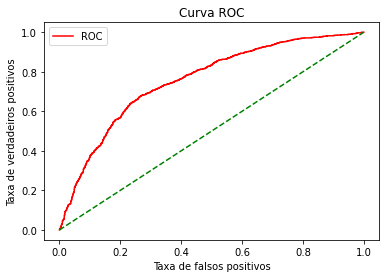

Acurácia modelo_LR1 sem transformação: 68.984%


In [67]:
# Criação do modelo LR1
modelo_LR1 = LogisticRegression()

# Treinamento do modelo LR1
modelo_LR1.fit(X_treino, Y_treino)

# Score do modelo nos dados de teste LR1
result_LR1 = modelo_LR1.score(X_teste, Y_teste)

# Plotando curva ROC e capturando as métricas
roc_LR1 = plot_roc_curve(modelo_LR1, X_teste, Y_teste)
 
# Print do resultado
print("Acurácia modelo_LR1 sem transformação: %.3f%%" % (result_LR1 * 100.0))

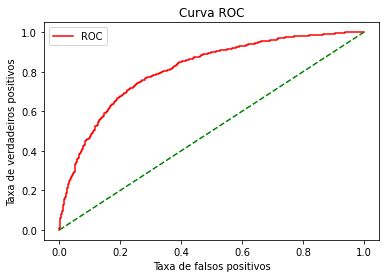

Acurácia modelo_LR2 transformado: 73.677%


In [68]:
# Criação do modelo LR2 transformado
modelo_LR2 = LogisticRegression()

# Treinamento do modelo
modelo_LR2.fit(X2_treino, Y2_treino)

# Score do modelo nos dados de teste
result_LR2 = modelo_LR2.score(X2_teste, Y2_teste)

# Plotando curva ROC e capturando as métricas
roc_LR2 = plot_roc_curve(modelo_LR2, X2_teste, Y2_teste)

# Print do resultado
print("Acurácia modelo_LR2 transformado: %.3f%%" % (result_LR2 * 100.0))

### Modelo Random Forest

In [69]:
# Definindo os valores para o número de folds
num_folds = 10

# Definindo o número de trees
num_trees = 100
max_features = 3

# Separando os dados em folds
kfold = KFold(n_splits = num_folds, shuffle = True, random_state = seed)

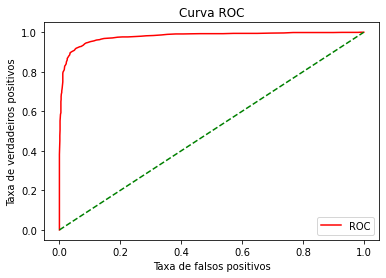

Acurácia modelo_RF1 sem transformação: 93.307


In [70]:
# Criando o modelo RF1
modelo_RF1 = RandomForestClassifier(n_estimators = num_trees, max_features = max_features)
modelo_RF1.fit(X_treino, Y_treino)

# Cross Validation
result_RF1 = cross_val_score(modelo_RF1, X_treino, Y_treino, cv = kfold)

# Plotando curva ROC e capturando as métricas
roc_RF1 = plot_roc_curve(modelo_RF1, X_teste, Y_teste)

# Print do resultado
print("Acurácia modelo_RF1 sem transformação: %.3f" % (result_RF1.mean() * 100))

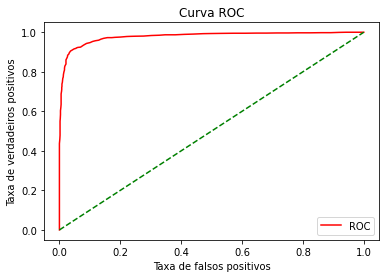

Acurácia modelo_RF2 transformado: 92.994


In [71]:
# Criando o modelo RF2
modelo_RF2 = RandomForestClassifier(n_estimators = num_trees, max_features = max_features)
modelo_RF2.fit(X2_treino, Y2_treino)

# Cross Validation
result_RF2 = cross_val_score(modelo_RF2, X2_treino, Y2_treino, cv = kfold)

# Plotando curva ROC e capturando as métricas
roc_RF2 = plot_roc_curve(modelo_RF2, X2_teste, Y2_teste)

# Print do resultado
print("Acurácia modelo_RF2 transformado: %.3f" % (result_RF2.mean() * 100))

### Modelo XGBoost

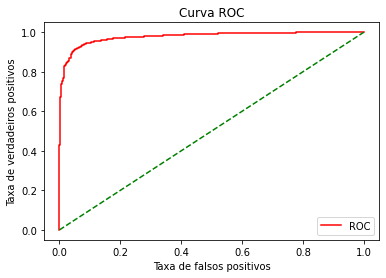

Acurácia no Modelo sem transformação: 92.978%


In [72]:
# Criação do modelo XGB1
modelo_XGB1 = XGBClassifier()

# Treinamento do modelo
modelo_XGB1.fit(X_treino, Y_treino, eval_metric='rmse')

# Fazendo previsões
y_pred = modelo_XGB1.predict(X_teste)
previsoes = [round(value) for value in y_pred]

# Avaliando as previsões
result_XGB1 = accuracy_score(Y_teste, previsoes)

# Plotando curva ROC e capturando as métricas
roc_XGB1 = plot_roc_curve(modelo_XGB1, X_teste, Y_teste)

# Print do resultado
print("Acurácia no Modelo sem transformação: %.3f%%" % (result_XGB1 * 100.0))

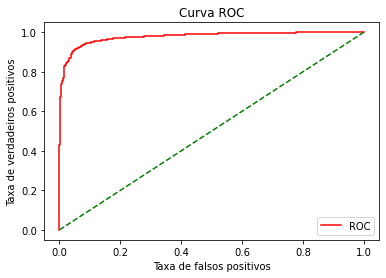

Acurácia no Modelo transformado: 92.978%


In [73]:
# Criação do modelo XGB2
modelo_XGB2 = XGBClassifier()

# Treinamento do modelo
modelo_XGB2.fit(X2_treino, Y2_treino, eval_metric='rmse')

# Fazendo previsões
y_pred = modelo_XGB2.predict(X2_teste)
previsoes = [round(value) for value in y_pred]

# Avaliando as previsões
result_XGB2 = accuracy_score(Y2_teste, previsoes)

# Plotando curva ROC e capturando as métricas
roc_XGB2 = plot_roc_curve(modelo_XGB2, X2_teste, Y2_teste)

# Print do resultado
print("Acurácia no Modelo transformado: %.3f%%" % (result_XGB2 * 100.0))

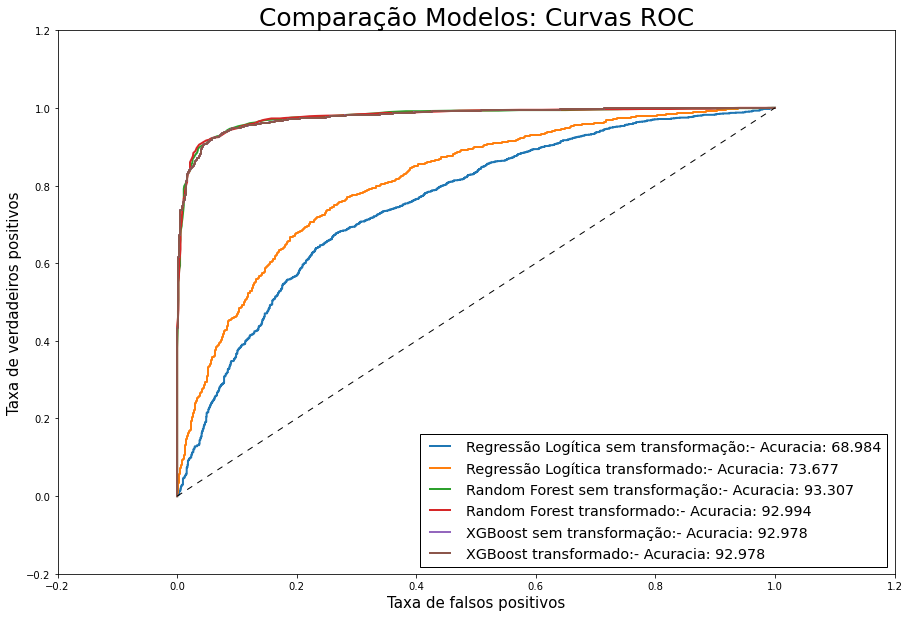

In [74]:
# Criando as listas com as métricas dos modelos
roc_list = [roc_LR1, roc_LR2, roc_RF1, roc_RF2, roc_XGB1, roc_XGB2]

model_nomes = ['Regressão Logítica sem transformação', 'Regressão Logítica transformado', 
               'Random Forest sem transformação', 'Random Forest transformado', 
               'XGBoost sem transformação', 'XGBoost transformado']

acuracia_list = [(result_LR1 * 100.0), (result_LR2 * 100.0), (result_RF1.mean() * 100), (result_RF2.mean() * 100),
                (result_XGB1 * 100.0), (result_XGB2 * 100.0)]

# Plotando as métricas
plt.figure(figsize=(15,10))

idx = 0

for roc in roc_list:
    plt.plot(roc[0], roc[1], label=f'{model_nomes[idx]}:- Acuracia: {acuracia_list[idx]:.3f}', linewidth=2)
    idx+=1

plt.style.use('classic')
plt.title('Comparação Modelos: Curvas ROC', fontsize=25)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('Taxa de falsos positivos', fontsize=15)
plt.ylabel('Taxa de verdadeiros positivos', fontsize=15)
plt.legend(loc='lower right')
plt.show()

## Conclusão

Mesmo com a recomendação da utilização da Regreção Logística os outros modelos utilizados tiveram melhor precisão.

Dentre os modelos construidos o que apresenta o melhor resultado é o Random Forest.